In [231]:
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import os
from scipy.stats import chi2_contingency
%matplotlib inline
import numpy as np
import seaborn as sns
import igraph as ig
from scipy.spatial.distance import cdist
import netplotbrain
from nilearn import datasets
from nilearn import plotting
from scipy.stats import zscore
import laBIBILaRORO as lbr
from importlib import reload
import matplotlib.pyplot as plt
#reload(lbr)

In [232]:
DIR=os.path.join("/NAS","tupac","protocoles","PULSE")

df_roi = pd.read_csv(os.path.join("/NAS","dumbo","protocoles","FAIRPARKII","Coord_ROI_atlas_inMNI.csv"))
#df_roi = df_roi.drop('Name_inFP2', axis=1)
df_roi.set_index('Name_inFP2', inplace=True)

file_path = '/NAS/tupac/romain/MNI_Glasser_extHCP_etc/HCP-MMP1_UniqueRegionList.csv'
df_exthcp = pd.read_csv(file_path)
#print(df_exthcp.head())  # Affiche les premières lignes du DataFrame

file_path = '/NAS/tupac/romain/MNI_Glasser_extHCP_etc/Glasser_2016_Table-1.xlsx'
df_gla = pd.read_excel(file_path)
df_gla


sinon pour volbrain regarder /NAS/tupac/romain/segMNIbyVolbrain/README.pdf

In [233]:
vb_regions_dict = {
    "3rd ventricle": 4,
    "4th ventricle": 11,
    "Right accumbens": 23,
    "Right amygdala": 31,
    "Brainstem": 35,
    "Right caudate": 36,
    "Right cerebellum exterior": 38,
    "Right cerebellum White Matter": 40,
    "Right cerebral White Matter": 44,
    "Right hippocampus": 47,
    "Right inf. lateral ventricle": 49,
    "Right lateral ventricle": 51,
    "Right pallidum": 55,
    "Right putamen": 57,
    "Right thalamus": 59,
    "Right ventral DC": 61,
    "Lobules I-V": 71,
    "Lobules VIII-X": 73,
    "Left basal forebrain": 75,
    "Right anterior cingulate gyrus": 100,
    "Right anterior insula": 102,
    "Right anterior orbital gyrus": 104,
    "Right angular gyrus": 106,
    "Right calcarine cortex": 108,
    "Right central operculum": 112,
    "Right cuneus": 114,
    "Right entorhinal area": 116,
    "Right frontal operculum": 118,
    "Right frontal pole": 120,
    "Right fusiform gyrus": 122,
    "Right gyrus rectus": 124,
    "Right inf. occipital gyrus": 128,
    "Right inf. temporal gyrus": 132,
    "Left accumbens": 30,
    "Left amygdala": 32,
    "Left caudate": 37,
    "Left cerebellum exterior": 39,
    "Left cerebellum White Matter": 41,
    "Left cerebral White Matter": 45,
    "Left hippocampus": 48,
    "Left inf. lateral ventricle": 50,
    "Left lateral ventricle": 52,
    "Left pallidum": 56,
    "Left putamen": 58,
    "Left thalamus": 60,
    "Left ventral DC": 62,
    "Lobules VI-VII": 72,
    "Right basal forebrain": 76,
    "Left anterior cingulate gyrus": 101,
    "Left anterior insula": 103,
    "Left anterior orbital gyrus": 105,
    "Left angular gyrus": 107,
    "Left calcarine cortex": 109,
    "Left central operculum": 113,
    "Left cuneus": 115,
    "Left entorhinal area": 117,
    "Left frontal operculum": 119,
    "Left frontal pole": 121,
    "Left fusiform gyrus": 123,
    "Left gyrus rectus": 125,
    "Left inf. occipital gyrus": 129,
    "Left inf. temporal gyrus": 133,
    "Right lingual gyrus": 134,
    "Right lateral orbital gyrus": 136,
    "Right middle cingulate gyrus": 138,
    "Right medial frontal cortex": 140,
    "Right middle frontal gyrus": 142,
    "Right middle occipital gyrus": 144,
    "Right medial orbital gyrus": 146,
    "Right postcentral gyrus medial segment": 148,
    "Right precentral gyrus medial segment": 150,
    "Right sup. frontal gyrus medial segment": 152,
    "Right middle temporal gyrus": 154,
    "Right occipital pole": 156,
    "Right occipital fusiform gyrus": 160,
    "Right opercular inf. frontal gyrus": 162,
    "Right orbital inf. frontal gyrus": 164,
    "Right posterior cingulate gyrus": 166,
    "Right precuneus": 168,
    "Right parahippocampal gyrus": 170,
    "Right posterior insula": 172,
    "Right parietal operculum": 174,
    "Right postcentral gyrus": 176,
    "Right posterior orbital gyrus": 178,
    "Right planum polare": 180,
    "Right precentral gyrus": 182,
    "Right planum temporale": 184,
    "Right subcallosal area": 186,
    "Right sup. frontal gyrus": 190,
    "Right supplementary motor cortex": 192,
    "Right supramarginal gyrus": 194,
    "Right sup. occipital gyrus": 196,
    "Right sup. parietal lobule": 198,
    "Left lingual gyrus": 135,
    "Left lateral orbital gyrus": 137,
    "Left middle cingulate gyrus": 139,
    "Left medial frontal cortex": 141,
    "Left middle frontal gyrus": 143,
    "Left middle occipital gyrus": 145,
    "Left medial orbital gyrus": 147,
    "Left postcentral gyrus medial segment": 149,
    "Left precentral gyrus medial segment": 151,
    "Left sup. frontal gyrus medial segment": 153,
    "Left middle temporal gyrus": 155,
    "Left occipital pole": 157,
    "Left occipital fusiform gyrus": 161,
    "Left opercular inf. frontal gyrus": 163,
    "Left orbital inf. frontal gyrus": 165,
    "Left posterior cingulate gyrus": 167,
    "Left precuneus": 169,
    "Left parahippocampal gyrus": 171,
    "Left posterior insula": 173,
    "Left parietal operculum": 175,
    "Left postcentral gyrus": 177,
    "Left posterior orbital gyrus": 179,
    "Left planum polare": 181,
    "Left precentral gyrus": 183,
    "Left planum temporale": 185,
    "Left subcallosal area": 187,
    "Left sup. frontal gyrus": 191,
    "Left supplementary motor cortex": 193,
    "Left supramarginal gyrus": 195,
    "Left sup. occipital gyrus": 197,
    "Left sup. parietal lobule": 199,
    "Left sup. temporal gyrus": 201,
    "Left temporal pole": 203,
    "Left triangular inf. frontal gyrus": 205,
    "Left transverse temporal gyrus": 207
}

In [234]:
vb_regions_dict = {key.replace(" ", "_"): value for key, value in vb_regions_dict.items()}

In [235]:
amygdala_hippocampus_regions = {key: value for key, value in vb_regions_dict.items() if "amygdala" in key.lower() or "hippocampus" in key.lower()}
print(amygdala_hippocampus_regions)

{'Right_amygdala': 31, 'Right_hippocampus': 47, 'Left_amygdala': 32, 'Left_hippocampus': 48}


In [236]:
for key_id,region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {key_id,region_id}")

Processing region ID: ('Right_amygdala', 31)
Processing region ID: ('Right_hippocampus', 47)
Processing region ID: ('Left_amygdala', 32)
Processing region ID: ('Left_hippocampus', 48)


freeview QSM/sub-0101[1-5]*/r_qsm_ChimapWarped.nii.gz Volbrain/native_structures_sub-0101[1-5]*_ses-M000_space-nativepro_T1w.nii.gz



reeview QSM/sub-1901[1-5]*/r_qsm_ChimapWarped.nii.gz Volbrain/native_structures_sub-1901[1-5]*_ses-M000_space-nativepro_T1w.nii.gz

In [237]:
import glob
import pandas as pd
import nibabel as nib
import numpy as np
import os
from scipy.stats import kurtosis
from tqdm import tqdm

# Define the path pattern
pattern = os.path.join(DIR, "QSM", "sub-*", "r_qsm_ChimapWarped.nii.gz")

# Find all matching files
files = glob.glob(pattern)

# Initialize a list to store data for all subjects
all_data = []

# Iterate over each file
# Create a progress bar
for fileQSM in tqdm(files, desc="Processing subjects"):
    SUBJ = fileQSM.split("/")[-2]
    fileVolbrain = os.path.join(DIR, "Volbrain", f"native_structures_{SUBJ}_ses-M000_space-nativepro_T1w.nii.gz")
    fileR2 = fileQSM.replace("r_qsm_ChimapWarped.nii.gz", "r_R2map_s-1Warped.nii.gz")
    if os.path.exists(fileVolbrain) and os.path.exists(fileQSM) and os.path.exists(fileR2):
        print(f"Processing files : {SUBJ} {fileQSM} {fileR2}")
        
        # Initialize a dictionary to store data for the current subject
        data = {'SUBJ': SUBJ}

        # Load the Volbrain file
        volbrain_img = nib.load(fileVolbrain)
        volbrain_data = volbrain_img.get_fdata()

        # Extract volumes for each region in amygdala_hippocampus_regions
        for region_name, region_id in amygdala_hippocampus_regions.items():
            region_volume = (volbrain_data == region_id).sum()
            data[f"{region_name}_volume"] = region_volume

        # Load the R2 and QSM files
        r2_img = nib.load(fileR2)
        r2_data = r2_img.get_fdata()

        qsm_img = nib.load(fileQSM)
        qsm_data = qsm_img.get_fdata()

        # Compute median and mean for R2 and QSM in each region
        for region_name, region_id in amygdala_hippocampus_regions.items():
            region_mask = volbrain_data == region_id
            r2_values = r2_data[region_mask]
            qsm_values = qsm_data[region_mask]

            data[f"{region_name}_R2_median"] = np.median(r2_values)
            data[f"{region_name}_R2_mean"] = np.mean(r2_values)
            data[f"{region_name}_QSM_median"] = np.median(qsm_values)
            data[f"{region_name}_QSM_mean"] = np.mean(qsm_values)
            
            # Compute median and mean for QSM (using only positive values)
            positive_qsm_values = qsm_values[qsm_values > 0]
            data[f"{region_name}_QSM_positive_median"] = np.median(positive_qsm_values) if positive_qsm_values.size > 0 else np.nan
            data[f"{region_name}_QSM_positive_mean"] = np.mean(positive_qsm_values) if positive_qsm_values.size > 0 else np.nan
            # Compute kurtosis for QSM in each region
            data[f"{region_name}_QSM_kurtosis"] = kurtosis(qsm_values, fisher=True, nan_policy='omit')
            
            # Compute kurtosis for QSM 
            data[f"{region_name}_QSM_kurtosis"] = kurtosis(qsm_values, fisher=True, nan_policy='omit') if qsm_values.size > 0 else np.nan
        # Append the data for the current subject to the list
        all_data.append(data)
    else:
        print(f"Missing files for {SUBJ} : {fileQSM} {fileR2} or {fileVolbrain}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(all_data).set_index('SUBJ')
print(df)

Processing subjects:   0%|          | 0/191 [00:00<?, ?it/s]

Processing files : sub-01144GMP /NAS/tupac/protocoles/PULSE/QSM/sub-01144GMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01144GMP/r_R2map_s-1Warped.nii.gz


Processing subjects:   1%|          | 1/191 [00:01<05:32,  1.75s/it]

Processing files : sub-01141JNP /NAS/tupac/protocoles/PULSE/QSM/sub-01141JNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01141JNP/r_R2map_s-1Warped.nii.gz


Processing subjects:   1%|          | 2/191 [00:03<04:52,  1.55s/it]

Processing files : sub-01150GNP /NAS/tupac/protocoles/PULSE/QSM/sub-01150GNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01150GNP/r_R2map_s-1Warped.nii.gz


Processing subjects:   2%|▏         | 3/191 [00:04<04:50,  1.54s/it]

Processing files : sub-01161FJP /NAS/tupac/protocoles/PULSE/QSM/sub-01161FJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01161FJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   2%|▏         | 4/191 [00:06<04:36,  1.48s/it]

Processing files : sub-01049DJP /NAS/tupac/protocoles/PULSE/QSM/sub-01049DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01049DJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   3%|▎         | 5/191 [00:07<04:41,  1.52s/it]

Processing files : sub-01080PAP /NAS/tupac/protocoles/PULSE/QSM/sub-01080PAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01080PAP/r_R2map_s-1Warped.nii.gz


Processing subjects:   3%|▎         | 6/191 [00:09<04:43,  1.53s/it]

Processing files : sub-01075LJP /NAS/tupac/protocoles/PULSE/QSM/sub-01075LJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01075LJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   4%|▎         | 7/191 [00:11<05:15,  1.72s/it]

Processing files : sub-01099GFP /NAS/tupac/protocoles/PULSE/QSM/sub-01099GFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01099GFP/r_R2map_s-1Warped.nii.gz


Processing subjects:   4%|▍         | 8/191 [00:13<05:16,  1.73s/it]

Processing files : sub-01129VHP /NAS/tupac/protocoles/PULSE/QSM/sub-01129VHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01129VHP/r_R2map_s-1Warped.nii.gz


Processing subjects:   5%|▍         | 9/191 [00:14<05:04,  1.67s/it]

Processing files : sub-01077QDP /NAS/tupac/protocoles/PULSE/QSM/sub-01077QDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01077QDP/r_R2map_s-1Warped.nii.gz


Processing subjects:   5%|▌         | 10/191 [00:16<05:04,  1.68s/it]

Processing files : sub-01068DJP /NAS/tupac/protocoles/PULSE/QSM/sub-01068DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01068DJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   6%|▌         | 11/191 [00:17<05:00,  1.67s/it]

Processing files : sub-01138DAP /NAS/tupac/protocoles/PULSE/QSM/sub-01138DAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01138DAP/r_R2map_s-1Warped.nii.gz


Processing subjects:   6%|▋         | 12/191 [00:19<05:15,  1.76s/it]

Processing files : sub-01133GSP /NAS/tupac/protocoles/PULSE/QSM/sub-01133GSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01133GSP/r_R2map_s-1Warped.nii.gz


Processing subjects:   7%|▋         | 13/191 [00:22<05:30,  1.86s/it]

Processing files : sub-01095GSP /NAS/tupac/protocoles/PULSE/QSM/sub-01095GSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01095GSP/r_R2map_s-1Warped.nii.gz


Processing subjects:   7%|▋         | 14/191 [00:24<05:55,  2.01s/it]

Processing files : sub-01007LAP /NAS/tupac/protocoles/PULSE/QSM/sub-01007LAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01007LAP/r_R2map_s-1Warped.nii.gz


Processing subjects:   8%|▊         | 15/191 [00:26<06:10,  2.10s/it]

Processing files : sub-01123MJP /NAS/tupac/protocoles/PULSE/QSM/sub-01123MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01123MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:   8%|▊         | 16/191 [00:29<06:52,  2.36s/it]

Processing files : sub-01156CMP /NAS/tupac/protocoles/PULSE/QSM/sub-01156CMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01156CMP/r_R2map_s-1Warped.nii.gz


Processing subjects:   9%|▉         | 17/191 [00:32<07:28,  2.58s/it]

Processing files : sub-01159MPP /NAS/tupac/protocoles/PULSE/QSM/sub-01159MPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01159MPP/r_R2map_s-1Warped.nii.gz


Processing subjects:   9%|▉         | 18/191 [00:35<07:15,  2.52s/it]

Processing files : sub-01126WRP /NAS/tupac/protocoles/PULSE/QSM/sub-01126WRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01126WRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  10%|▉         | 19/191 [00:36<06:31,  2.28s/it]

Processing files : sub-01162CYP /NAS/tupac/protocoles/PULSE/QSM/sub-01162CYP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01162CYP/r_R2map_s-1Warped.nii.gz


Processing subjects:  10%|█         | 20/191 [00:38<05:54,  2.07s/it]

Processing files : sub-01160MAP /NAS/tupac/protocoles/PULSE/QSM/sub-01160MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01160MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  11%|█         | 21/191 [00:40<05:30,  1.94s/it]

Processing files : sub-01084TBP /NAS/tupac/protocoles/PULSE/QSM/sub-01084TBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01084TBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  12%|█▏        | 22/191 [00:41<05:12,  1.85s/it]

Processing files : sub-01043PMP /NAS/tupac/protocoles/PULSE/QSM/sub-01043PMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01043PMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  12%|█▏        | 23/191 [00:43<05:07,  1.83s/it]

Processing files : sub-01024GJP /NAS/tupac/protocoles/PULSE/QSM/sub-01024GJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01024GJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  13%|█▎        | 24/191 [00:45<05:15,  1.89s/it]

Processing files : sub-01139DMP /NAS/tupac/protocoles/PULSE/QSM/sub-01139DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01139DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  13%|█▎        | 25/191 [00:46<04:48,  1.74s/it]

Processing files : sub-01149ATP /NAS/tupac/protocoles/PULSE/QSM/sub-01149ATP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01149ATP/r_R2map_s-1Warped.nii.gz


Processing subjects:  14%|█▎        | 26/191 [00:48<04:39,  1.69s/it]

Processing files : sub-01006SCP /NAS/tupac/protocoles/PULSE/QSM/sub-01006SCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01006SCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  14%|█▍        | 27/191 [00:49<04:26,  1.62s/it]

Processing files : sub-01128DLP /NAS/tupac/protocoles/PULSE/QSM/sub-01128DLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01128DLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  15%|█▍        | 28/191 [00:51<04:24,  1.62s/it]

Processing files : sub-01082DMP /NAS/tupac/protocoles/PULSE/QSM/sub-01082DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01082DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  15%|█▌        | 29/191 [00:53<04:15,  1.58s/it]

Processing files : sub-01158FMP /NAS/tupac/protocoles/PULSE/QSM/sub-01158FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01158FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  16%|█▌        | 30/191 [00:54<04:13,  1.57s/it]

Processing files : sub-01152DPP /NAS/tupac/protocoles/PULSE/QSM/sub-01152DPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01152DPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  16%|█▌        | 31/191 [00:56<04:14,  1.59s/it]

Processing files : sub-01155SPP /NAS/tupac/protocoles/PULSE/QSM/sub-01155SPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01155SPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  17%|█▋        | 32/191 [00:57<04:01,  1.52s/it]

Processing files : sub-01146VYP /NAS/tupac/protocoles/PULSE/QSM/sub-01146VYP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01146VYP/r_R2map_s-1Warped.nii.gz


Processing subjects:  17%|█▋        | 33/191 [00:59<03:58,  1.51s/it]

Processing files : sub-01163BAP /NAS/tupac/protocoles/PULSE/QSM/sub-01163BAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01163BAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  18%|█▊        | 34/191 [01:00<03:55,  1.50s/it]

Processing files : sub-01166MJP /NAS/tupac/protocoles/PULSE/QSM/sub-01166MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01166MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  18%|█▊        | 35/191 [01:01<03:49,  1.47s/it]

Processing files : sub-01167DLP /NAS/tupac/protocoles/PULSE/QSM/sub-01167DLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01167DLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  19%|█▉        | 36/191 [01:03<03:50,  1.48s/it]

Processing files : sub-01168GJP /NAS/tupac/protocoles/PULSE/QSM/sub-01168GJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01168GJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  19%|█▉        | 37/191 [01:04<03:49,  1.49s/it]

Processing files : sub-01169LVP /NAS/tupac/protocoles/PULSE/QSM/sub-01169LVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01169LVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  20%|█▉        | 38/191 [01:06<03:49,  1.50s/it]

Processing files : sub-01170CTP /NAS/tupac/protocoles/PULSE/QSM/sub-01170CTP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01170CTP/r_R2map_s-1Warped.nii.gz


Processing subjects:  20%|██        | 39/191 [01:07<03:41,  1.46s/it]

Processing files : sub-01172HRP /NAS/tupac/protocoles/PULSE/QSM/sub-01172HRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01172HRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  21%|██        | 40/191 [01:09<03:39,  1.45s/it]

Processing files : sub-01175RJP /NAS/tupac/protocoles/PULSE/QSM/sub-01175RJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01175RJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  21%|██▏       | 41/191 [01:10<03:37,  1.45s/it]

Processing files : sub-01173WGP /NAS/tupac/protocoles/PULSE/QSM/sub-01173WGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01173WGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  22%|██▏       | 42/191 [01:12<03:39,  1.48s/it]

Processing files : sub-01176KPP /NAS/tupac/protocoles/PULSE/QSM/sub-01176KPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01176KPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  23%|██▎       | 43/191 [01:13<03:34,  1.45s/it]

Processing files : sub-01178LDP /NAS/tupac/protocoles/PULSE/QSM/sub-01178LDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01178LDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  23%|██▎       | 44/191 [01:15<03:32,  1.45s/it]

Processing files : sub-01179DDP /NAS/tupac/protocoles/PULSE/QSM/sub-01179DDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01179DDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  24%|██▎       | 45/191 [01:16<03:31,  1.45s/it]

Processing files : sub-01186MJP /NAS/tupac/protocoles/PULSE/QSM/sub-01186MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01186MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  24%|██▍       | 46/191 [01:18<03:35,  1.49s/it]

Processing files : sub-01187VJP /NAS/tupac/protocoles/PULSE/QSM/sub-01187VJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01187VJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  25%|██▍       | 47/191 [01:19<03:33,  1.48s/it]

Processing files : sub-01188ABP /NAS/tupac/protocoles/PULSE/QSM/sub-01188ABP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01188ABP/r_R2map_s-1Warped.nii.gz


Processing subjects:  25%|██▌       | 48/191 [01:20<03:27,  1.45s/it]

Processing files : sub-01189DLP /NAS/tupac/protocoles/PULSE/QSM/sub-01189DLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01189DLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  26%|██▌       | 49/191 [01:22<03:23,  1.43s/it]

Processing files : sub-01192DJP /NAS/tupac/protocoles/PULSE/QSM/sub-01192DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01192DJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  26%|██▌       | 50/191 [01:23<03:23,  1.44s/it]

Processing files : sub-03002MGP /NAS/tupac/protocoles/PULSE/QSM/sub-03002MGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03002MGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  27%|██▋       | 51/191 [01:25<03:19,  1.42s/it]

Processing files : sub-02001HRP /NAS/tupac/protocoles/PULSE/QSM/sub-02001HRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-02001HRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  27%|██▋       | 52/191 [01:26<03:17,  1.42s/it]

Processing files : sub-03003MAP /NAS/tupac/protocoles/PULSE/QSM/sub-03003MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03003MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  28%|██▊       | 53/191 [01:27<03:10,  1.38s/it]

Processing files : sub-03004DBP /NAS/tupac/protocoles/PULSE/QSM/sub-03004DBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03004DBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  28%|██▊       | 54/191 [01:29<03:11,  1.39s/it]

Processing files : sub-03005VJP /NAS/tupac/protocoles/PULSE/QSM/sub-03005VJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03005VJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  29%|██▉       | 55/191 [01:30<03:10,  1.40s/it]

Processing files : sub-03006SFP /NAS/tupac/protocoles/PULSE/QSM/sub-03006SFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03006SFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  29%|██▉       | 56/191 [01:32<03:06,  1.38s/it]

Processing files : sub-03007AFP /NAS/tupac/protocoles/PULSE/QSM/sub-03007AFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03007AFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  30%|██▉       | 57/191 [01:33<03:04,  1.37s/it]

Processing files : sub-03009BCP /NAS/tupac/protocoles/PULSE/QSM/sub-03009BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03009BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  30%|███       | 58/191 [01:34<02:57,  1.34s/it]

Processing files : sub-03010BFP /NAS/tupac/protocoles/PULSE/QSM/sub-03010BFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03010BFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  31%|███       | 59/191 [01:35<02:55,  1.33s/it]

Processing files : sub-03011MJP /NAS/tupac/protocoles/PULSE/QSM/sub-03011MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03011MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  31%|███▏      | 60/191 [01:37<02:53,  1.33s/it]

Processing files : sub-03012CCP /NAS/tupac/protocoles/PULSE/QSM/sub-03012CCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03012CCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  32%|███▏      | 61/191 [01:38<02:51,  1.32s/it]

Processing files : sub-03013DCP /NAS/tupac/protocoles/PULSE/QSM/sub-03013DCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03013DCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  32%|███▏      | 62/191 [01:39<02:51,  1.33s/it]

Processing files : sub-03014PHP /NAS/tupac/protocoles/PULSE/QSM/sub-03014PHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03014PHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  33%|███▎      | 63/191 [01:41<02:47,  1.31s/it]

Processing files : sub-03015RAP /NAS/tupac/protocoles/PULSE/QSM/sub-03015RAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03015RAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  34%|███▎      | 64/191 [01:42<02:44,  1.30s/it]

Processing files : sub-03016MEP /NAS/tupac/protocoles/PULSE/QSM/sub-03016MEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03016MEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  34%|███▍      | 65/191 [01:43<02:42,  1.29s/it]

Processing files : sub-03018MAP /NAS/tupac/protocoles/PULSE/QSM/sub-03018MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03018MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  35%|███▍      | 66/191 [01:45<02:41,  1.30s/it]

Processing files : sub-03019JJP /NAS/tupac/protocoles/PULSE/QSM/sub-03019JJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03019JJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  35%|███▌      | 67/191 [01:46<02:49,  1.36s/it]

Processing files : sub-03020PGP /NAS/tupac/protocoles/PULSE/QSM/sub-03020PGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03020PGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  36%|███▌      | 68/191 [01:47<02:46,  1.35s/it]

Processing files : sub-03022ABP /NAS/tupac/protocoles/PULSE/QSM/sub-03022ABP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03022ABP/r_R2map_s-1Warped.nii.gz


Processing subjects:  36%|███▌      | 69/191 [01:49<02:43,  1.34s/it]

Processing files : sub-03021TSP /NAS/tupac/protocoles/PULSE/QSM/sub-03021TSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03021TSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  37%|███▋      | 70/191 [01:50<02:42,  1.34s/it]

Processing files : sub-03023PPP /NAS/tupac/protocoles/PULSE/QSM/sub-03023PPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03023PPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  37%|███▋      | 71/191 [01:51<02:38,  1.32s/it]

Processing files : sub-03025PVP /NAS/tupac/protocoles/PULSE/QSM/sub-03025PVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03025PVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  38%|███▊      | 72/191 [01:53<02:32,  1.28s/it]

Processing files : sub-03024LVP /NAS/tupac/protocoles/PULSE/QSM/sub-03024LVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03024LVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  38%|███▊      | 73/191 [01:54<02:24,  1.23s/it]

Processing files : sub-03029PLP /NAS/tupac/protocoles/PULSE/QSM/sub-03029PLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03029PLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  39%|███▊      | 74/191 [01:55<02:24,  1.24s/it]

Processing files : sub-03031TMP /NAS/tupac/protocoles/PULSE/QSM/sub-03031TMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03031TMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  39%|███▉      | 75/191 [01:56<02:19,  1.20s/it]

Processing files : sub-03035PRP /NAS/tupac/protocoles/PULSE/QSM/sub-03035PRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03035PRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  40%|███▉      | 76/191 [01:57<02:20,  1.22s/it]

Processing files : sub-03037LNP /NAS/tupac/protocoles/PULSE/QSM/sub-03037LNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03037LNP/r_R2map_s-1Warped.nii.gz


Processing subjects:  40%|████      | 77/191 [01:58<02:17,  1.20s/it]

Processing files : sub-03039DAP /NAS/tupac/protocoles/PULSE/QSM/sub-03039DAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03039DAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  41%|████      | 78/191 [02:00<02:21,  1.25s/it]

Processing files : sub-03036DRP /NAS/tupac/protocoles/PULSE/QSM/sub-03036DRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03036DRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  41%|████▏     | 79/191 [02:01<02:22,  1.27s/it]

Processing files : sub-03038FMP /NAS/tupac/protocoles/PULSE/QSM/sub-03038FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03038FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  42%|████▏     | 80/191 [02:03<02:40,  1.44s/it]

Processing files : sub-03041LIP /NAS/tupac/protocoles/PULSE/QSM/sub-03041LIP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03041LIP/r_R2map_s-1Warped.nii.gz


Processing subjects:  42%|████▏     | 81/191 [02:05<02:42,  1.48s/it]

Processing files : sub-03040DMP /NAS/tupac/protocoles/PULSE/QSM/sub-03040DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03040DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  43%|████▎     | 82/191 [02:06<02:52,  1.58s/it]

Processing files : sub-03044VGP /NAS/tupac/protocoles/PULSE/QSM/sub-03044VGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03044VGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  43%|████▎     | 83/191 [02:08<02:44,  1.52s/it]

Processing files : sub-03043DMP /NAS/tupac/protocoles/PULSE/QSM/sub-03043DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03043DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  44%|████▍     | 84/191 [02:09<02:37,  1.47s/it]

Processing files : sub-03047BDP /NAS/tupac/protocoles/PULSE/QSM/sub-03047BDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03047BDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  45%|████▍     | 85/191 [02:10<02:29,  1.41s/it]

Processing files : sub-03049RCP /NAS/tupac/protocoles/PULSE/QSM/sub-03049RCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03049RCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  45%|████▌     | 86/191 [02:12<02:27,  1.40s/it]

Processing files : sub-03059BMP /NAS/tupac/protocoles/PULSE/QSM/sub-03059BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03059BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  46%|████▌     | 87/191 [02:13<02:23,  1.38s/it]

Processing files : sub-03055LEP /NAS/tupac/protocoles/PULSE/QSM/sub-03055LEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03055LEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  46%|████▌     | 88/191 [02:14<02:16,  1.32s/it]

Processing files : sub-03062LEP /NAS/tupac/protocoles/PULSE/QSM/sub-03062LEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03062LEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  47%|████▋     | 89/191 [02:16<02:15,  1.33s/it]

Processing files : sub-03063BGP /NAS/tupac/protocoles/PULSE/QSM/sub-03063BGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03063BGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  47%|████▋     | 90/191 [02:18<02:34,  1.53s/it]

Processing files : sub-03064BPP /NAS/tupac/protocoles/PULSE/QSM/sub-03064BPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03064BPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  48%|████▊     | 91/191 [02:19<02:29,  1.49s/it]

Processing files : sub-03065MBP /NAS/tupac/protocoles/PULSE/QSM/sub-03065MBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-03065MBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  48%|████▊     | 92/191 [02:21<02:34,  1.56s/it]

Processing files : sub-04001RCP /NAS/tupac/protocoles/PULSE/QSM/sub-04001RCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04001RCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  49%|████▊     | 93/191 [02:22<02:32,  1.56s/it]

Processing files : sub-04002MAP /NAS/tupac/protocoles/PULSE/QSM/sub-04002MAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04002MAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  49%|████▉     | 94/191 [02:24<02:29,  1.54s/it]

Processing files : sub-04005PHP /NAS/tupac/protocoles/PULSE/QSM/sub-04005PHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04005PHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  50%|████▉     | 95/191 [02:26<02:32,  1.59s/it]

Processing files : sub-04009RSP /NAS/tupac/protocoles/PULSE/QSM/sub-04009RSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04009RSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  50%|█████     | 96/191 [02:27<02:33,  1.61s/it]

Processing files : sub-04006DCP /NAS/tupac/protocoles/PULSE/QSM/sub-04006DCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04006DCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  51%|█████     | 97/191 [02:28<02:22,  1.52s/it]

Processing files : sub-04011BSP /NAS/tupac/protocoles/PULSE/QSM/sub-04011BSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04011BSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  51%|█████▏    | 98/191 [02:30<02:23,  1.55s/it]

Processing files : sub-04013LJP /NAS/tupac/protocoles/PULSE/QSM/sub-04013LJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04013LJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  52%|█████▏    | 99/191 [02:31<02:16,  1.48s/it]

Processing files : sub-04017RPP /NAS/tupac/protocoles/PULSE/QSM/sub-04017RPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04017RPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  52%|█████▏    | 100/191 [02:33<02:16,  1.50s/it]

Processing files : sub-04015BMP /NAS/tupac/protocoles/PULSE/QSM/sub-04015BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04015BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  53%|█████▎    | 101/191 [02:34<02:09,  1.44s/it]

Processing files : sub-04018SPP /NAS/tupac/protocoles/PULSE/QSM/sub-04018SPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04018SPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  53%|█████▎    | 102/191 [02:36<02:06,  1.42s/it]

Processing files : sub-04019NFP /NAS/tupac/protocoles/PULSE/QSM/sub-04019NFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-04019NFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  54%|█████▍    | 103/191 [02:37<02:04,  1.42s/it]

Processing files : sub-09057APP /NAS/tupac/protocoles/PULSE/QSM/sub-09057APP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09057APP/r_R2map_s-1Warped.nii.gz


Processing subjects:  54%|█████▍    | 104/191 [02:38<02:02,  1.40s/it]

Processing files : sub-09066RSP /NAS/tupac/protocoles/PULSE/QSM/sub-09066RSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09066RSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  55%|█████▍    | 105/191 [02:40<01:59,  1.39s/it]

Processing files : sub-09064JSP /NAS/tupac/protocoles/PULSE/QSM/sub-09064JSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09064JSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  55%|█████▌    | 106/191 [02:41<01:58,  1.39s/it]

Processing files : sub-09075CMP /NAS/tupac/protocoles/PULSE/QSM/sub-09075CMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09075CMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  56%|█████▌    | 107/191 [02:42<01:54,  1.37s/it]

Processing files : sub-09076CDP /NAS/tupac/protocoles/PULSE/QSM/sub-09076CDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09076CDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  57%|█████▋    | 108/191 [02:44<01:54,  1.38s/it]

Processing files : sub-09099CJP /NAS/tupac/protocoles/PULSE/QSM/sub-09099CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-09099CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  57%|█████▋    | 109/191 [02:45<01:52,  1.37s/it]

Processing files : sub-10004CCP /NAS/tupac/protocoles/PULSE/QSM/sub-10004CCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10004CCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  58%|█████▊    | 110/191 [02:47<01:54,  1.41s/it]

Processing files : sub-10007BYP /NAS/tupac/protocoles/PULSE/QSM/sub-10007BYP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10007BYP/r_R2map_s-1Warped.nii.gz


Processing subjects:  58%|█████▊    | 111/191 [02:48<01:58,  1.48s/it]

Processing files : sub-10009LJP /NAS/tupac/protocoles/PULSE/QSM/sub-10009LJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10009LJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  59%|█████▊    | 112/191 [02:50<02:09,  1.64s/it]

Processing files : sub-10014BSP /NAS/tupac/protocoles/PULSE/QSM/sub-10014BSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10014BSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  59%|█████▉    | 113/191 [02:52<02:07,  1.64s/it]

Processing files : sub-10018CAP /NAS/tupac/protocoles/PULSE/QSM/sub-10018CAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10018CAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  60%|█████▉    | 114/191 [02:54<02:04,  1.61s/it]

Processing files : sub-10019TCP /NAS/tupac/protocoles/PULSE/QSM/sub-10019TCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10019TCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  60%|██████    | 115/191 [02:55<02:02,  1.61s/it]

Processing files : sub-10030CAP /NAS/tupac/protocoles/PULSE/QSM/sub-10030CAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-10030CAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  61%|██████    | 116/191 [02:57<02:01,  1.62s/it]

Processing files : sub-13001KBP /NAS/tupac/protocoles/PULSE/QSM/sub-13001KBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13001KBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  61%|██████▏   | 117/191 [02:58<01:57,  1.58s/it]

Processing files : sub-13002BSP /NAS/tupac/protocoles/PULSE/QSM/sub-13002BSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13002BSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  62%|██████▏   | 118/191 [03:00<01:51,  1.53s/it]

Processing files : sub-13003EGP /NAS/tupac/protocoles/PULSE/QSM/sub-13003EGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13003EGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  62%|██████▏   | 119/191 [03:01<01:44,  1.45s/it]

Processing files : sub-13004DFP /NAS/tupac/protocoles/PULSE/QSM/sub-13004DFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13004DFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  63%|██████▎   | 120/191 [03:03<01:45,  1.48s/it]

Processing files : sub-13008BMP /NAS/tupac/protocoles/PULSE/QSM/sub-13008BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13008BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  63%|██████▎   | 121/191 [03:04<01:40,  1.43s/it]

Processing files : sub-13009MPP /NAS/tupac/protocoles/PULSE/QSM/sub-13009MPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13009MPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  64%|██████▍   | 122/191 [03:06<01:45,  1.52s/it]

Processing files : sub-13010NSP /NAS/tupac/protocoles/PULSE/QSM/sub-13010NSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13010NSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  64%|██████▍   | 123/191 [03:07<01:39,  1.46s/it]

Processing files : sub-13011GHP /NAS/tupac/protocoles/PULSE/QSM/sub-13011GHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13011GHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  65%|██████▍   | 124/191 [03:08<01:36,  1.45s/it]

Processing files : sub-13012ZFP /NAS/tupac/protocoles/PULSE/QSM/sub-13012ZFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13012ZFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  65%|██████▌   | 125/191 [03:10<01:33,  1.41s/it]

Processing files : sub-13013VCP /NAS/tupac/protocoles/PULSE/QSM/sub-13013VCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13013VCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  66%|██████▌   | 126/191 [03:11<01:27,  1.35s/it]

Processing files : sub-13014PMP /NAS/tupac/protocoles/PULSE/QSM/sub-13014PMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-13014PMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  66%|██████▋   | 127/191 [03:12<01:22,  1.30s/it]

Processing files : sub-15003FMP /NAS/tupac/protocoles/PULSE/QSM/sub-15003FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15003FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  67%|██████▋   | 128/191 [03:13<01:22,  1.31s/it]

Processing files : sub-15001GCP /NAS/tupac/protocoles/PULSE/QSM/sub-15001GCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15001GCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  68%|██████▊   | 129/191 [03:15<01:21,  1.32s/it]

Processing files : sub-15002OJP /NAS/tupac/protocoles/PULSE/QSM/sub-15002OJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15002OJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  68%|██████▊   | 130/191 [03:17<01:30,  1.49s/it]

Processing files : sub-15004CAP /NAS/tupac/protocoles/PULSE/QSM/sub-15004CAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15004CAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  69%|██████▊   | 131/191 [03:18<01:28,  1.48s/it]

Processing files : sub-15006ORP /NAS/tupac/protocoles/PULSE/QSM/sub-15006ORP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15006ORP/r_R2map_s-1Warped.nii.gz


Processing subjects:  69%|██████▉   | 132/191 [03:19<01:27,  1.48s/it]

Processing files : sub-15008BMP /NAS/tupac/protocoles/PULSE/QSM/sub-15008BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-15008BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  70%|██████▉   | 133/191 [03:21<01:24,  1.46s/it]

Processing files : sub-19001LDP /NAS/tupac/protocoles/PULSE/QSM/sub-19001LDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19001LDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  70%|███████   | 134/191 [03:22<01:20,  1.41s/it]

Processing files : sub-19002APP /NAS/tupac/protocoles/PULSE/QSM/sub-19002APP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19002APP/r_R2map_s-1Warped.nii.gz


Processing subjects:  71%|███████   | 135/191 [03:24<01:17,  1.39s/it]

Processing files : sub-19003BJP /NAS/tupac/protocoles/PULSE/QSM/sub-19003BJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19003BJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  71%|███████   | 136/191 [03:25<01:13,  1.34s/it]

Processing files : sub-19004MMP /NAS/tupac/protocoles/PULSE/QSM/sub-19004MMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19004MMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  72%|███████▏  | 137/191 [03:26<01:11,  1.33s/it]

Processing files : sub-19005GJP /NAS/tupac/protocoles/PULSE/QSM/sub-19005GJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19005GJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  72%|███████▏  | 138/191 [03:27<01:08,  1.29s/it]

Processing files : sub-19006MBP /NAS/tupac/protocoles/PULSE/QSM/sub-19006MBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19006MBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  73%|███████▎  | 139/191 [03:29<01:07,  1.30s/it]

Processing files : sub-19008BCP /NAS/tupac/protocoles/PULSE/QSM/sub-19008BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19008BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  73%|███████▎  | 140/191 [03:30<01:05,  1.28s/it]

Processing files : sub-19010BCP /NAS/tupac/protocoles/PULSE/QSM/sub-19010BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19010BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  74%|███████▍  | 141/191 [03:31<01:06,  1.33s/it]

Processing files : sub-19011GMP /NAS/tupac/protocoles/PULSE/QSM/sub-19011GMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19011GMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  74%|███████▍  | 142/191 [03:32<01:03,  1.29s/it]

Processing files : sub-19015BMP /NAS/tupac/protocoles/PULSE/QSM/sub-19015BMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19015BMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  75%|███████▍  | 143/191 [03:34<00:59,  1.25s/it]

Processing files : sub-19016MJP /NAS/tupac/protocoles/PULSE/QSM/sub-19016MJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19016MJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  75%|███████▌  | 144/191 [03:35<00:59,  1.26s/it]

Processing files : sub-19017GLP /NAS/tupac/protocoles/PULSE/QSM/sub-19017GLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19017GLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  76%|███████▌  | 145/191 [03:36<00:56,  1.22s/it]

Processing files : sub-19018GDP /NAS/tupac/protocoles/PULSE/QSM/sub-19018GDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19018GDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  76%|███████▋  | 146/191 [03:37<00:55,  1.23s/it]

Processing files : sub-19019FNP /NAS/tupac/protocoles/PULSE/QSM/sub-19019FNP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19019FNP/r_R2map_s-1Warped.nii.gz


Processing subjects:  77%|███████▋  | 147/191 [03:39<00:54,  1.25s/it]

Processing files : sub-19020MSP /NAS/tupac/protocoles/PULSE/QSM/sub-19020MSP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19020MSP/r_R2map_s-1Warped.nii.gz


Processing subjects:  77%|███████▋  | 148/191 [03:40<00:52,  1.23s/it]

Processing files : sub-19024AMP /NAS/tupac/protocoles/PULSE/QSM/sub-19024AMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19024AMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  78%|███████▊  | 149/191 [03:41<00:50,  1.21s/it]

Processing files : sub-19021AFP /NAS/tupac/protocoles/PULSE/QSM/sub-19021AFP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19021AFP/r_R2map_s-1Warped.nii.gz


Processing subjects:  79%|███████▊  | 150/191 [03:42<00:50,  1.22s/it]

Processing files : sub-19025AYT /NAS/tupac/protocoles/PULSE/QSM/sub-19025AYT/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19025AYT/r_R2map_s-1Warped.nii.gz


Processing subjects:  79%|███████▉  | 151/191 [03:44<00:55,  1.38s/it]

Processing files : sub-19027LRP /NAS/tupac/protocoles/PULSE/QSM/sub-19027LRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19027LRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  80%|███████▉  | 152/191 [03:46<00:58,  1.51s/it]

Processing files : sub-19026ORP /NAS/tupac/protocoles/PULSE/QSM/sub-19026ORP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19026ORP/r_R2map_s-1Warped.nii.gz


Processing subjects:  80%|████████  | 153/191 [03:48<01:08,  1.81s/it]

Processing files : sub-19028HCP /NAS/tupac/protocoles/PULSE/QSM/sub-19028HCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19028HCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  81%|████████  | 154/191 [03:50<01:08,  1.86s/it]

Processing files : sub-19029FJP /NAS/tupac/protocoles/PULSE/QSM/sub-19029FJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19029FJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  81%|████████  | 155/191 [03:52<01:03,  1.77s/it]

Processing files : sub-19030CJP /NAS/tupac/protocoles/PULSE/QSM/sub-19030CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19030CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  82%|████████▏ | 156/191 [03:53<00:58,  1.68s/it]

Processing files : sub-19031RPP /NAS/tupac/protocoles/PULSE/QSM/sub-19031RPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19031RPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  82%|████████▏ | 157/191 [03:55<00:54,  1.59s/it]

Processing files : sub-19034LEP /NAS/tupac/protocoles/PULSE/QSM/sub-19034LEP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19034LEP/r_R2map_s-1Warped.nii.gz


Processing subjects:  83%|████████▎ | 158/191 [03:56<00:50,  1.52s/it]

Processing files : sub-19035SPP /NAS/tupac/protocoles/PULSE/QSM/sub-19035SPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19035SPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  83%|████████▎ | 159/191 [03:57<00:47,  1.50s/it]

Processing files : sub-19036CJP /NAS/tupac/protocoles/PULSE/QSM/sub-19036CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19036CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  84%|████████▍ | 160/191 [03:59<00:43,  1.41s/it]

Processing files : sub-19037GHP /NAS/tupac/protocoles/PULSE/QSM/sub-19037GHP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19037GHP/r_R2map_s-1Warped.nii.gz


Processing subjects:  84%|████████▍ | 161/191 [04:00<00:41,  1.37s/it]

Processing files : sub-01002KAP /NAS/tupac/protocoles/PULSE/QSM/sub-01002KAP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01002KAP/r_R2map_s-1Warped.nii.gz


Processing subjects:  85%|████████▍ | 162/191 [04:01<00:40,  1.40s/it]

Processing files : sub-01005AGP /NAS/tupac/protocoles/PULSE/QSM/sub-01005AGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01005AGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  85%|████████▌ | 163/191 [04:03<00:38,  1.38s/it]

Processing files : sub-01008LBP /NAS/tupac/protocoles/PULSE/QSM/sub-01008LBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01008LBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  86%|████████▌ | 164/191 [04:04<00:36,  1.35s/it]

Processing files : sub-01010DCP /NAS/tupac/protocoles/PULSE/QSM/sub-01010DCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01010DCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  86%|████████▋ | 165/191 [04:05<00:35,  1.38s/it]

Processing files : sub-01012CCP /NAS/tupac/protocoles/PULSE/QSM/sub-01012CCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01012CCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  87%|████████▋ | 166/191 [04:07<00:33,  1.36s/it]

Processing files : sub-01013BCP /NAS/tupac/protocoles/PULSE/QSM/sub-01013BCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01013BCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  87%|████████▋ | 167/191 [04:08<00:32,  1.34s/it]

Processing files : sub-01014FMP /NAS/tupac/protocoles/PULSE/QSM/sub-01014FMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01014FMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  88%|████████▊ | 168/191 [04:10<00:34,  1.51s/it]

Processing files : sub-01015MCP /NAS/tupac/protocoles/PULSE/QSM/sub-01015MCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01015MCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  88%|████████▊ | 169/191 [04:11<00:31,  1.41s/it]

Processing files : sub-01016WRP /NAS/tupac/protocoles/PULSE/QSM/sub-01016WRP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01016WRP/r_R2map_s-1Warped.nii.gz


Processing subjects:  89%|████████▉ | 170/191 [04:12<00:29,  1.39s/it]

Processing files : sub-01017NBP /NAS/tupac/protocoles/PULSE/QSM/sub-01017NBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01017NBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  90%|████████▉ | 171/191 [04:14<00:27,  1.36s/it]

Processing files : sub-01018BVP /NAS/tupac/protocoles/PULSE/QSM/sub-01018BVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01018BVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  90%|█████████ | 172/191 [04:15<00:25,  1.32s/it]

Processing files : sub-01019VJP /NAS/tupac/protocoles/PULSE/QSM/sub-01019VJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01019VJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  91%|█████████ | 173/191 [04:16<00:23,  1.33s/it]

Processing files : sub-01021EMP /NAS/tupac/protocoles/PULSE/QSM/sub-01021EMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01021EMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  91%|█████████ | 174/191 [04:18<00:23,  1.35s/it]

Processing files : sub-01022SDP /NAS/tupac/protocoles/PULSE/QSM/sub-01022SDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01022SDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  92%|█████████▏| 175/191 [04:19<00:21,  1.32s/it]

Processing files : sub-01023AMP /NAS/tupac/protocoles/PULSE/QSM/sub-01023AMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01023AMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  92%|█████████▏| 176/191 [04:20<00:19,  1.30s/it]

Processing files : sub-01025FVP /NAS/tupac/protocoles/PULSE/QSM/sub-01025FVP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01025FVP/r_R2map_s-1Warped.nii.gz


Processing subjects:  93%|█████████▎| 177/191 [04:22<00:17,  1.28s/it]

Processing files : sub-01027KJP /NAS/tupac/protocoles/PULSE/QSM/sub-01027KJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01027KJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  93%|█████████▎| 178/191 [04:23<00:16,  1.29s/it]

Processing files : sub-01030CBP /NAS/tupac/protocoles/PULSE/QSM/sub-01030CBP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01030CBP/r_R2map_s-1Warped.nii.gz


Processing subjects:  94%|█████████▎| 179/191 [04:24<00:16,  1.34s/it]

Processing files : sub-01035CJP /NAS/tupac/protocoles/PULSE/QSM/sub-01035CJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01035CJP/r_R2map_s-1Warped.nii.gz


Processing subjects:  94%|█████████▍| 180/191 [04:26<00:14,  1.36s/it]

Processing files : sub-01036TTP /NAS/tupac/protocoles/PULSE/QSM/sub-01036TTP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01036TTP/r_R2map_s-1Warped.nii.gz


Processing subjects:  95%|█████████▍| 181/191 [04:27<00:13,  1.34s/it]

Processing files : sub-01038DMP /NAS/tupac/protocoles/PULSE/QSM/sub-01038DMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01038DMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  95%|█████████▌| 182/191 [04:28<00:11,  1.31s/it]

Processing files : sub-01040LLP /NAS/tupac/protocoles/PULSE/QSM/sub-01040LLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01040LLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  96%|█████████▌| 183/191 [04:30<00:10,  1.36s/it]

Processing files : sub-01042DDP /NAS/tupac/protocoles/PULSE/QSM/sub-01042DDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01042DDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  96%|█████████▋| 184/191 [04:31<00:09,  1.36s/it]

Processing files : sub-01053NDP /NAS/tupac/protocoles/PULSE/QSM/sub-01053NDP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01053NDP/r_R2map_s-1Warped.nii.gz


Processing subjects:  97%|█████████▋| 185/191 [04:32<00:07,  1.33s/it]

Processing files : sub-01054VLP /NAS/tupac/protocoles/PULSE/QSM/sub-01054VLP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01054VLP/r_R2map_s-1Warped.nii.gz


Processing subjects:  97%|█████████▋| 186/191 [04:34<00:06,  1.32s/it]

Processing files : sub-01064PCP /NAS/tupac/protocoles/PULSE/QSM/sub-01064PCP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01064PCP/r_R2map_s-1Warped.nii.gz


Processing subjects:  98%|█████████▊| 187/191 [04:35<00:05,  1.31s/it]

Processing files : sub-01070TPP /NAS/tupac/protocoles/PULSE/QSM/sub-01070TPP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01070TPP/r_R2map_s-1Warped.nii.gz


Processing subjects:  98%|█████████▊| 188/191 [04:36<00:03,  1.30s/it]

Processing files : sub-01072HMP /NAS/tupac/protocoles/PULSE/QSM/sub-01072HMP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-01072HMP/r_R2map_s-1Warped.nii.gz


Processing subjects:  99%|█████████▉| 189/191 [04:38<00:02,  1.36s/it]

Processing files : sub-19038HGP /NAS/tupac/protocoles/PULSE/QSM/sub-19038HGP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19038HGP/r_R2map_s-1Warped.nii.gz


Processing subjects:  99%|█████████▉| 190/191 [04:39<00:01,  1.30s/it]

Processing files : sub-19042DJP /NAS/tupac/protocoles/PULSE/QSM/sub-19042DJP/r_qsm_ChimapWarped.nii.gz /NAS/tupac/protocoles/PULSE/QSM/sub-19042DJP/r_R2map_s-1Warped.nii.gz


Processing subjects: 100%|██████████| 191/191 [04:40<00:00,  1.47s/it]

              Right_amygdala_volume  Right_hippocampus_volume  \
SUBJ                                                            
sub-01144GMP                   1155                      3582   
sub-01141JNP                   1189                      3373   
sub-01150GNP                    902                      3139   
sub-01161FJP                   1127                      3441   
sub-01049DJP                   1106                      3634   
...                             ...                       ...   
sub-01064PCP                   1064                      3209   
sub-01070TPP                   1138                      3942   
sub-01072HMP                    925                      2895   
sub-19038HGP                   1019                      3661   
sub-19042DJP                   1089                      3103   

              Left_amygdala_volume  Left_hippocampus_volume  \
SUBJ                                                          
sub-01144GMP                

In [247]:
df_part = pd.read_excel(os.path.join(DIR,'Liste_finale_des_participants.xlsx'))
df_part.set_index('participant_id', inplace=True)
df.index = df.index.str.replace("sub-", "", regex=False)
df_test=df_part[['Declin','AGE','SEXE','SITE_APP','Centre','V0','Diff_inclusion_PS','Score_de_declinaison']].dropna(inplace=False).join(df)
df_test = df_test.copy()
qsm_columns = [col for col in df_test.columns if "QSM" in col and "kurtosis" not in col]
df_test[qsm_columns] = df_test[qsm_columns] * 100

In [248]:
subjects_per_centre = df_test.groupby('Centre').size()
print(subjects_per_centre)

Centre
Angers    29
Autres    37
Lille     66
Paris     39
dtype: int64


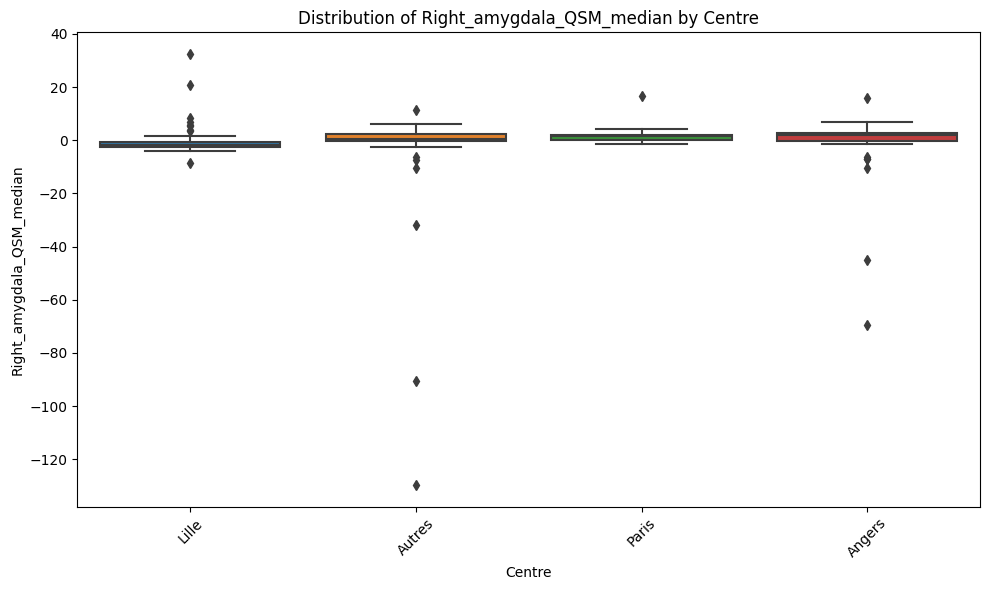

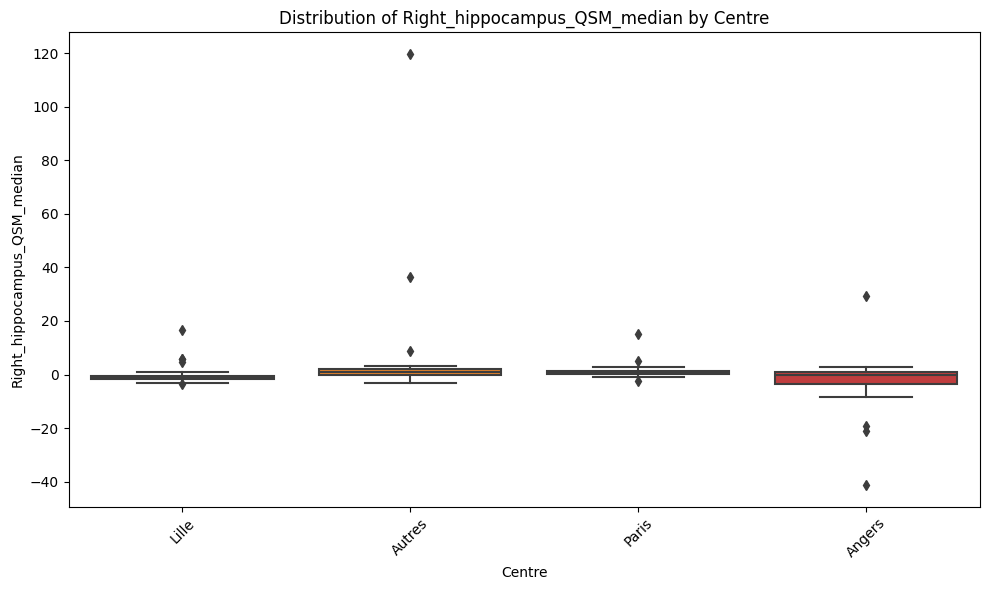

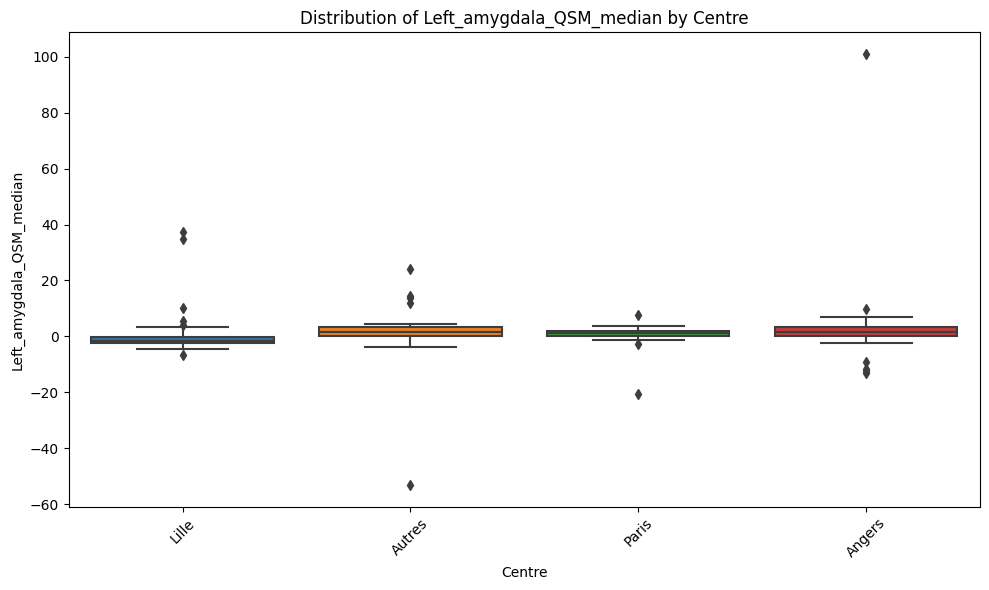

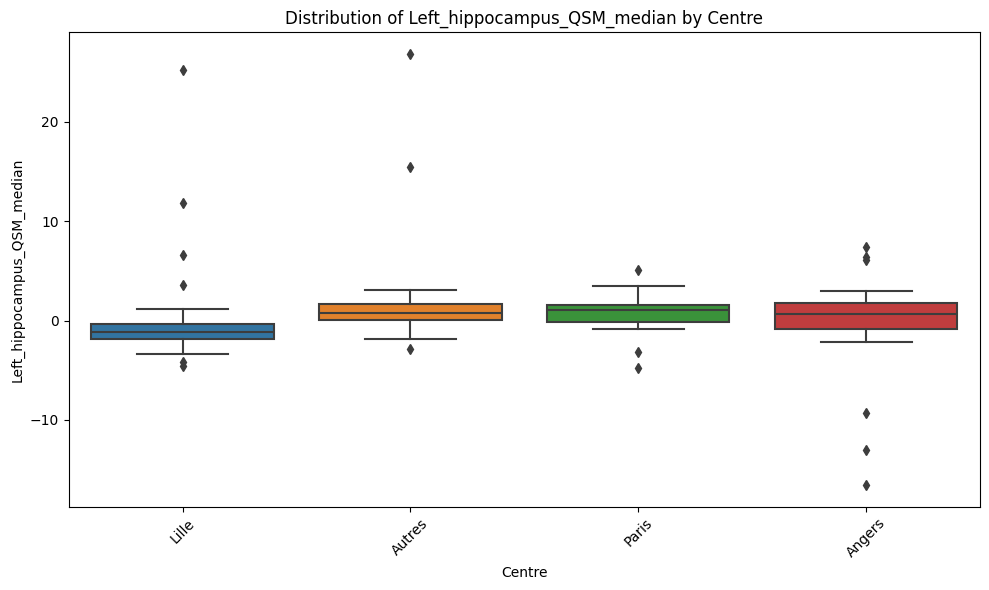

In [249]:
# Sélectionner les colonnes d'intérêt
columns_to_compare = [col for col in df_test.columns if "QSM" in col and "median" in col and "positive" not in col]

# Tracer les boxplots pour chaque colonne
for column in columns_to_compare:
    if column in df_test.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_test, x='Centre', y=column)
        plt.title(f"Distribution of {column} by Centre")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

La bibil à RORO loaded
Processing region ID: ('Right_amygdala', 31)
T-test for Right_amygdala_volume : p-value=0.00048


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


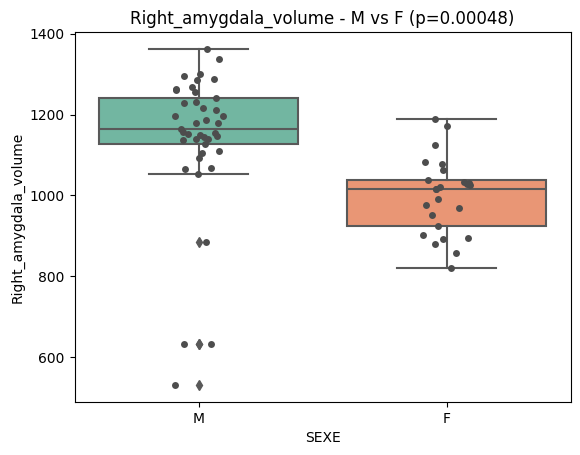

T-test for Right_amygdala_R2_median : p-value=0.28673
T-test for Right_amygdala_R2_mean : p-value=0.05829
T-test for Right_amygdala_QSM_median : p-value=0.2517
T-test for Right_amygdala_QSM_mean : p-value=0.25857
T-test for Right_amygdala_QSM_positive_median : p-value=0.12594
T-test for Right_amygdala_QSM_positive_mean : p-value=0.14015
T-test for Right_amygdala_QSM_kurtosis : p-value=0.13557
Processing region ID: ('Right_hippocampus', 47)
T-test for Right_hippocampus_volume : p-value=0.00511


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


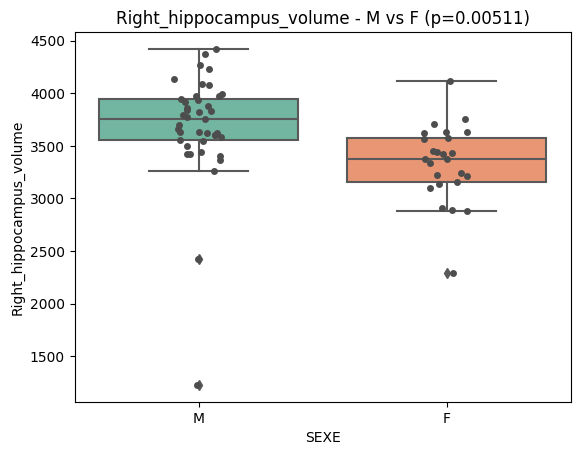

T-test for Right_hippocampus_R2_median : p-value=0.01497


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


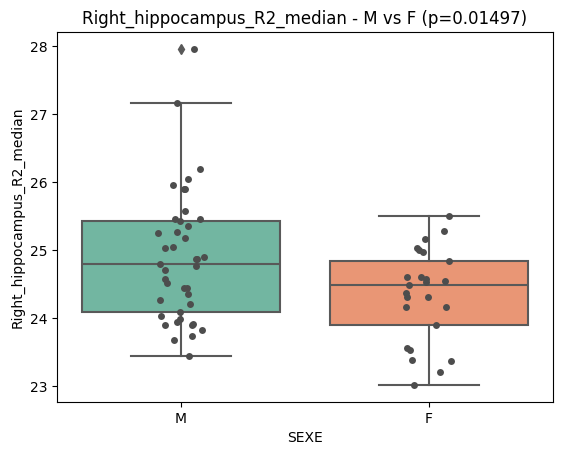

T-test for Right_hippocampus_R2_mean : p-value=0.06215
T-test for Right_hippocampus_QSM_median : p-value=0.12775
T-test for Right_hippocampus_QSM_mean : p-value=0.10622
T-test for Right_hippocampus_QSM_positive_median : p-value=0.11794
T-test for Right_hippocampus_QSM_positive_mean : p-value=0.12117
T-test for Right_hippocampus_QSM_kurtosis : p-value=0.03347


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


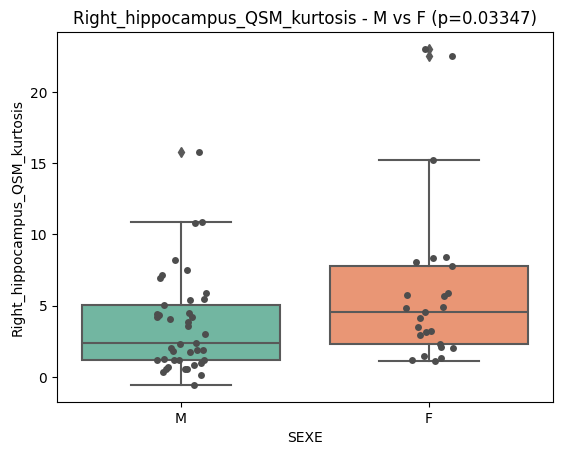

Processing region ID: ('Left_amygdala', 32)
T-test for Left_amygdala_volume : p-value=0.0


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


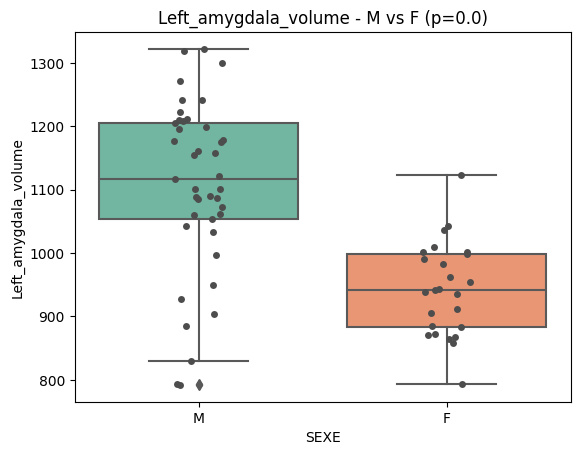

T-test for Left_amygdala_R2_median : p-value=0.66677
T-test for Left_amygdala_R2_mean : p-value=0.72562
T-test for Left_amygdala_QSM_median : p-value=0.10809
T-test for Left_amygdala_QSM_mean : p-value=0.11674
T-test for Left_amygdala_QSM_positive_median : p-value=0.12159
T-test for Left_amygdala_QSM_positive_mean : p-value=0.15992
T-test for Left_amygdala_QSM_kurtosis : p-value=0.01043


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


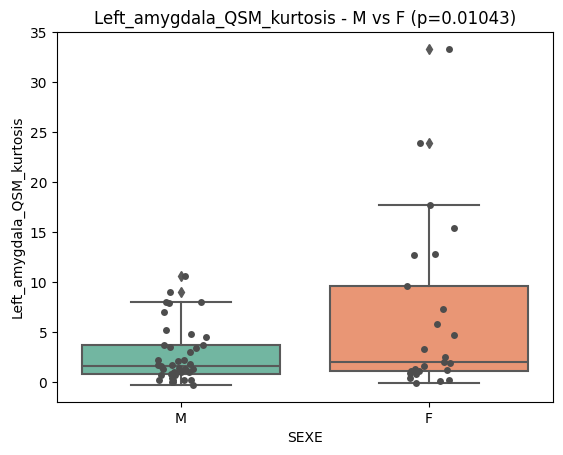

Processing region ID: ('Left_hippocampus', 48)
T-test for Left_hippocampus_volume : p-value=7e-05


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


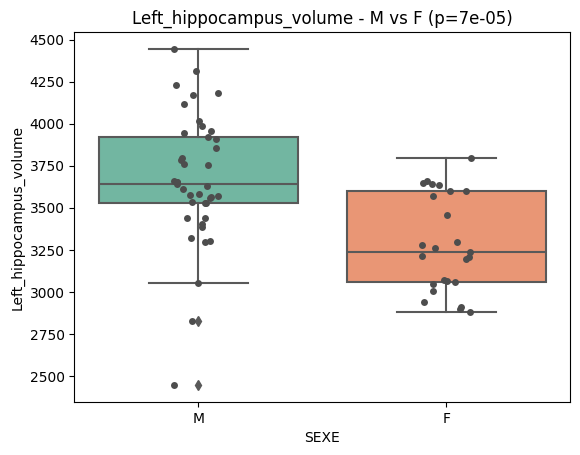

T-test for Left_hippocampus_R2_median : p-value=0.01007


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


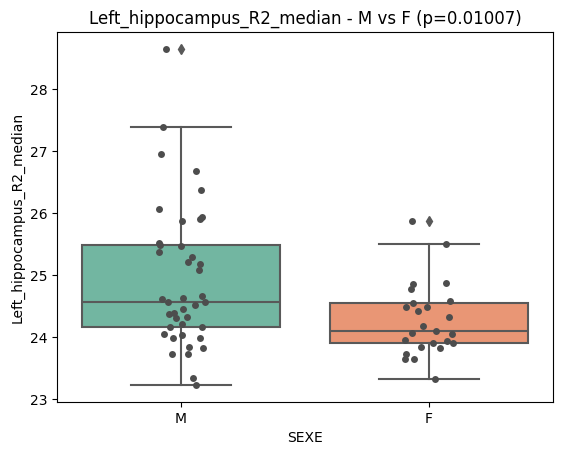

T-test for Left_hippocampus_R2_mean : p-value=0.0036


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


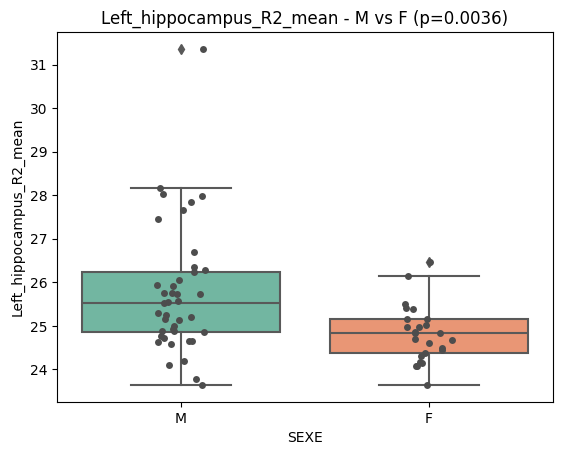

T-test for Left_hippocampus_QSM_median : p-value=0.13947
T-test for Left_hippocampus_QSM_mean : p-value=0.12231
T-test for Left_hippocampus_QSM_positive_median : p-value=0.12965
T-test for Left_hippocampus_QSM_positive_mean : p-value=0.11983
T-test for Left_hippocampus_QSM_kurtosis : p-value=0.721


In [250]:
df_test = df_test[df_test['Centre'] == 'Lille']
reload(lbr)
pd.option_context('mode.use_inf_as_na', True)
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    lbr.regress_covar_func(columns_with_region_name[1:],['AGE','Diff_inclusion_PS',columns_with_region_name[0]],df_test.dropna(axis=1),df_test.dropna(axis=1), display=False)
    lbr.test_covar_funcOnTwoGroups(columns_with_region_name,df_test,'SEXE','M','F', 0.05)

In [251]:
df_test.groupby('Declin')[variable].agg(['mean', 'std'])

,mean,std
Declin,,
Fast,24.054222,0.982082
Slow,23.546167,1.161566


Processing region ID: ('Right_amygdala', 31)
Columns with region name: ['Right_amygdala_R2_median', 'Right_amygdala_R2_mean', 'Right_amygdala_QSM_median', 'Right_amygdala_QSM_mean', 'Right_amygdala_QSM_positive_median', 'Right_amygdala_QSM_positive_mean', 'Right_amygdala_QSM_kurtosis']
T-test for Right_amygdala_QSM_median : p-value=0.83108


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


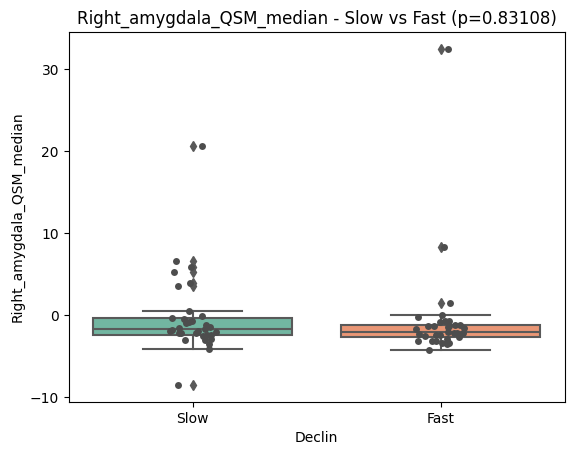

Processing region ID: ('Right_hippocampus', 47)
Columns with region name: ['Right_hippocampus_R2_median', 'Right_hippocampus_R2_mean', 'Right_hippocampus_QSM_median', 'Right_hippocampus_QSM_mean', 'Right_hippocampus_QSM_positive_median', 'Right_hippocampus_QSM_positive_mean', 'Right_hippocampus_QSM_kurtosis']
T-test for Right_hippocampus_QSM_median : p-value=0.05623


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


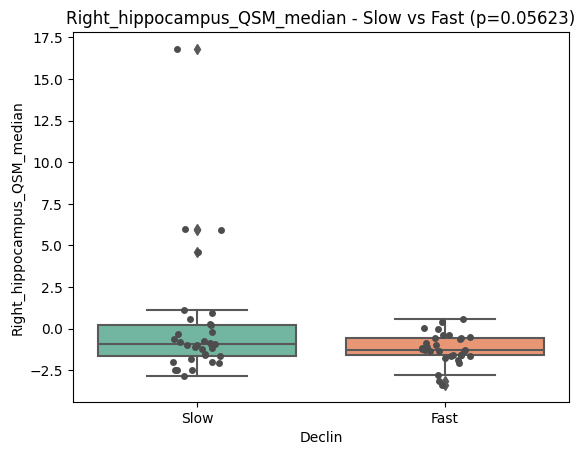

Processing region ID: ('Left_amygdala', 32)
Columns with region name: ['Left_amygdala_R2_median', 'Left_amygdala_R2_mean', 'Left_amygdala_QSM_median', 'Left_amygdala_QSM_mean', 'Left_amygdala_QSM_positive_median', 'Left_amygdala_QSM_positive_mean', 'Left_amygdala_QSM_kurtosis']
T-test for Left_amygdala_QSM_median : p-value=0.51673


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


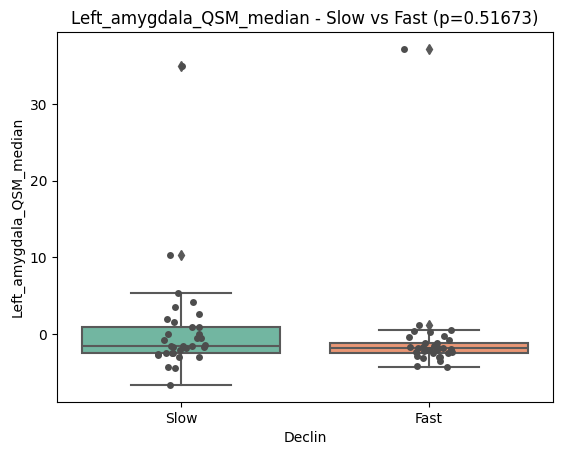

Processing region ID: ('Left_hippocampus', 48)
Columns with region name: ['Left_hippocampus_R2_median', 'Left_hippocampus_R2_mean', 'Left_hippocampus_QSM_median', 'Left_hippocampus_QSM_mean', 'Left_hippocampus_QSM_positive_median', 'Left_hippocampus_QSM_positive_mean', 'Left_hippocampus_QSM_kurtosis']
T-test for Left_hippocampus_QSM_median : p-value=0.08083


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


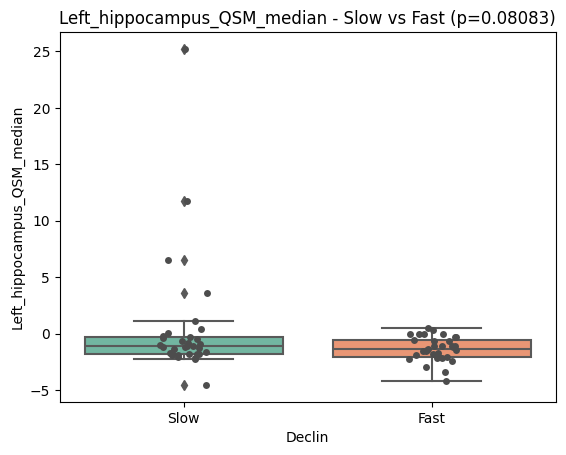

In [252]:
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    print(f"Columns with region name: {columns_with_region_name[1:]}")
    # nb_std=1
    # for variable in columns_with_region_name[1:]:
    #     mean,std=df_test.groupby('Declin')[variable].agg(['mean', 'std'])
    #     df_test[(df_test[variable] >= mean - nb_std * std) & (df_test[variable] <= mean + nb_std * std)]
    
    test = lbr.remove_outliers_bygroup(df_test,columns_with_region_name[3:4], 'Declin', nb_std=1, verbose=False)
    #df_tmp=df_test.groupby('Declin').apply(lambda x: filter_group(x, columns_with_region_name[1:], 3)).reset_index(drop=True)
    #    return df.groupby(group).apply(lambda x: filter_group(x, variable, nb_std)).reset_index(drop=True)
    lbr.test_covar_funcOnTwoGroups(columns_with_region_name[3:4], df_test, 'Declin', 'Slow', 'Fast',1)

Processing region ID: ('Right_amygdala', 31)
Columns with region name: ['Right_amygdala_R2_median', 'Right_amygdala_R2_mean', 'Right_amygdala_QSM_median', 'Right_amygdala_QSM_mean', 'Right_amygdala_QSM_positive_median', 'Right_amygdala_QSM_positive_mean', 'Right_amygdala_QSM_kurtosis']
 Right_amygdala_R2_median 
                 Right_amygdala_R2_median                       
                                     size  mean   min   max  std
SITE_APP                                                        
Bulbaire                               14  23.7  22.1  24.8  0.9
Membre inférieur                       21  24.0  21.4  26.2  1.3
Membre supérieur                       31  23.7  21.6  26.4  1.0 
 ANOVA for Right_amygdala_R2_median : 0.509


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


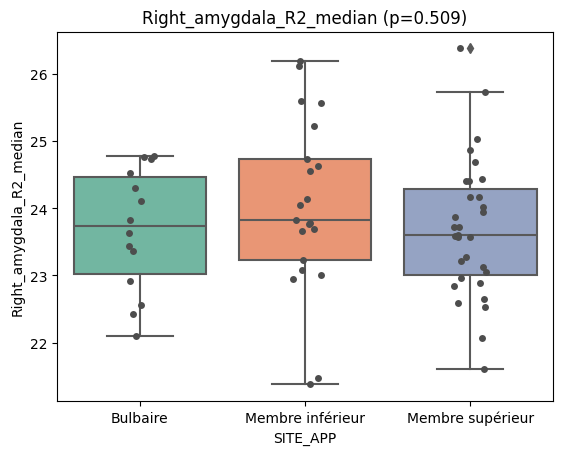

 Right_amygdala_R2_mean 
                 Right_amygdala_R2_mean                       
                                   size  mean   min   max  std
SITE_APP                                                      
Bulbaire                             14  24.4  22.4  26.6  1.0
Membre inférieur                     21  24.4  21.5  26.5  1.3
Membre supérieur                     31  24.1  21.9  27.2  1.1 
 ANOVA for Right_amygdala_R2_mean : 0.748


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


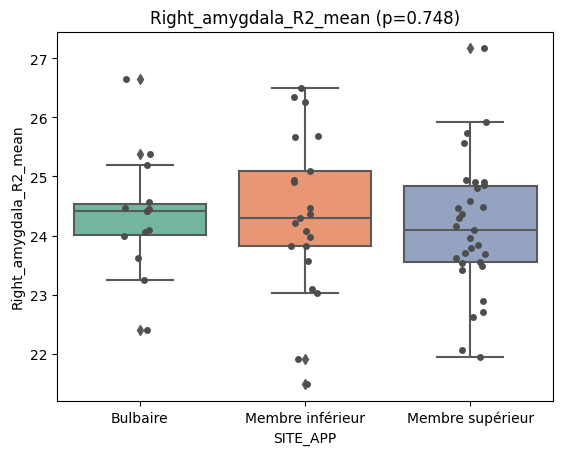

 Right_amygdala_QSM_median 
                 Right_amygdala_QSM_median                     
                                      size mean  min   max  std
SITE_APP                                                       
Bulbaire                                14 -1.3 -3.1   8.4  2.9
Membre inférieur                        21 -2.2 -8.5   3.6  2.3
Membre supérieur                        31  1.2 -3.5  32.5  7.4 
 ANOVA for Right_amygdala_QSM_median : 0.06761


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


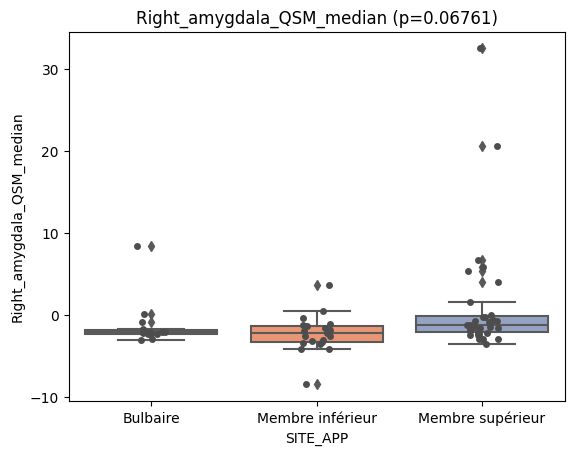

 Right_amygdala_QSM_mean 
                 Right_amygdala_QSM_mean                     
                                    size mean  min   max  std
SITE_APP                                                     
Bulbaire                              14 -1.2 -3.2   7.3  2.6
Membre inférieur                      21 -2.2 -7.2   4.3  2.2
Membre supérieur                      31  1.1 -3.6  31.6  7.2 
 ANOVA for Right_amygdala_QSM_mean : 0.0805


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


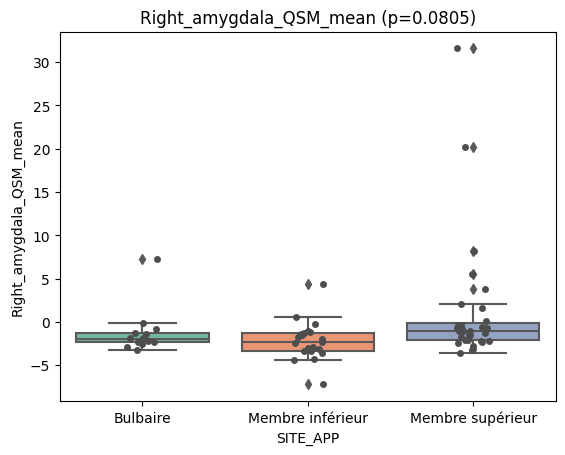

 Right_amygdala_QSM_positive_median 
                 Right_amygdala_QSM_positive_median                      
                                               size mean  min   max   std
SITE_APP                                                                 
Bulbaire                                         14  2.2  0.5  12.1   2.9
Membre inférieur                                 21  1.9  0.6   9.4   2.0
Membre supérieur                                 31  6.3  0.6  51.5  11.8 
 ANOVA for Right_amygdala_QSM_positive_median : 0.13072


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


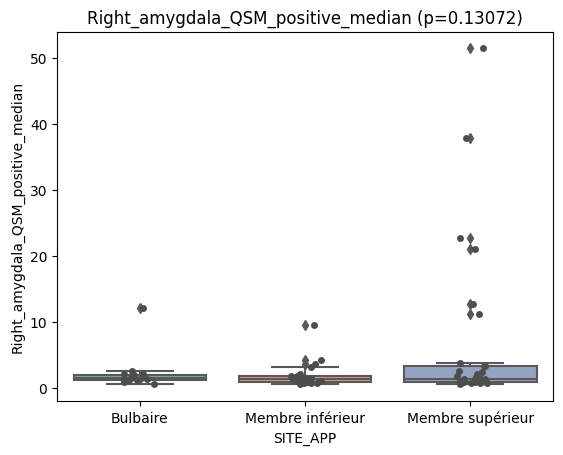

 Right_amygdala_QSM_positive_mean 
                 Right_amygdala_QSM_positive_mean                      
                                             size mean  min   max   std
SITE_APP                                                               
Bulbaire                                       14  3.2  1.1  14.1   3.2
Membre inférieur                               21  2.8  1.1  10.6   2.1
Membre supérieur                               31  7.7  0.7  61.2  13.7 
 ANOVA for Right_amygdala_QSM_positive_mean : 0.13809


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


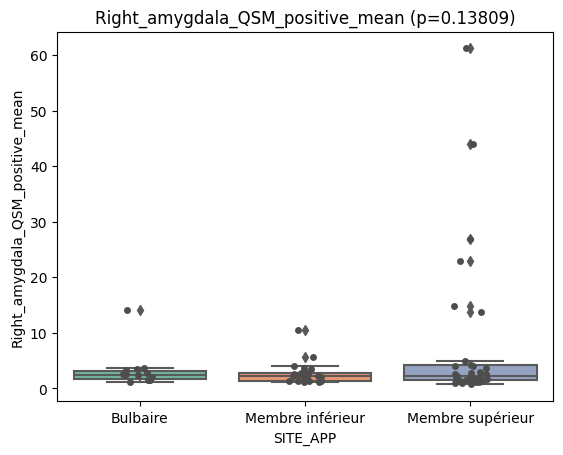

 Right_amygdala_QSM_kurtosis 
                 Right_amygdala_QSM_kurtosis                     
                                        size mean  min   max  std
SITE_APP                                                         
Bulbaire                                  14  6.3  0.3  14.0  4.9
Membre inférieur                          21  4.3 -0.3  23.0  6.3
Membre supérieur                          31  4.0 -0.3  25.0  6.1 
 ANOVA for Right_amygdala_QSM_kurtosis : 0.47249


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


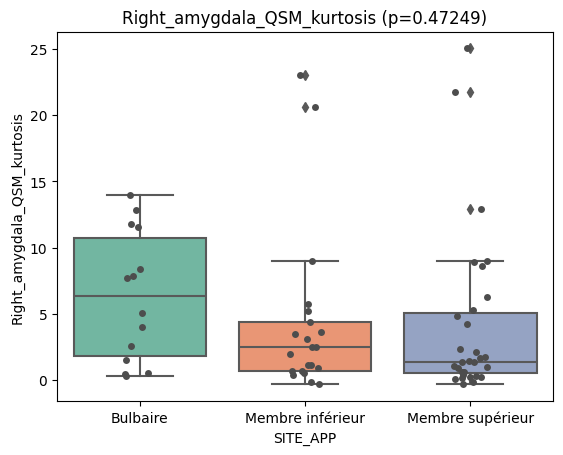

Processing region ID: ('Right_hippocampus', 47)
Columns with region name: ['Right_hippocampus_R2_median', 'Right_hippocampus_R2_mean', 'Right_hippocampus_QSM_median', 'Right_hippocampus_QSM_mean', 'Right_hippocampus_QSM_positive_median', 'Right_hippocampus_QSM_positive_mean', 'Right_hippocampus_QSM_kurtosis']
 Right_hippocampus_R2_median 
                 Right_hippocampus_R2_median                       
                                        size  mean   min   max  std
SITE_APP                                                           
Bulbaire                                  14  24.6  23.0  26.2  0.7
Membre inférieur                          21  24.6  23.2  26.0  0.8
Membre supérieur                          31  24.8  23.4  28.0  1.1 
 ANOVA for Right_hippocampus_R2_median : 0.73548


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


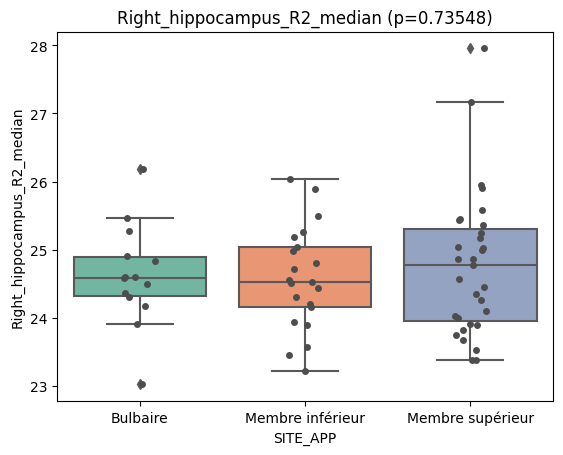

 Right_hippocampus_R2_mean 
                 Right_hippocampus_R2_mean                       
                                      size  mean   min   max  std
SITE_APP                                                         
Bulbaire                                14  25.2  23.8  26.5  0.8
Membre inférieur                        21  25.2  23.3  27.6  1.0
Membre supérieur                        31  25.6  23.7  29.0  1.3 
 ANOVA for Right_hippocampus_R2_mean : 0.32115


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


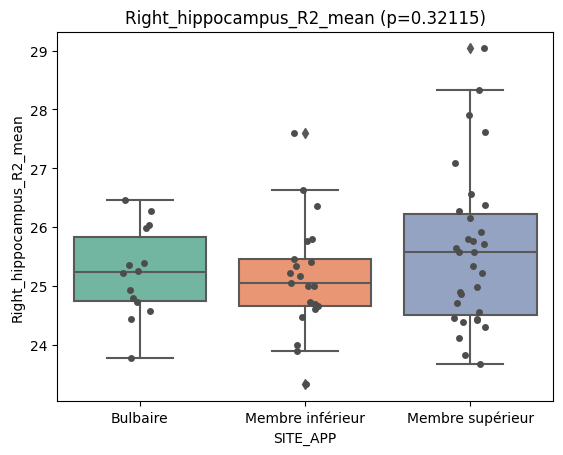

 Right_hippocampus_QSM_median 
                 Right_hippocampus_QSM_median                     
                                         size mean  min   max  std
SITE_APP                                                          
Bulbaire                                   14 -1.3 -3.4  -0.0  0.9
Membre inférieur                           21 -1.0 -2.8   1.1  1.0
Membre supérieur                           31  0.0 -3.2  16.8  3.8 
 ANOVA for Right_hippocampus_QSM_median : 0.21679


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


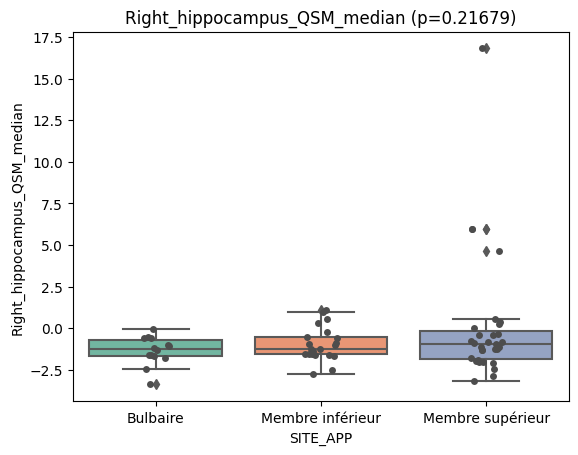

 Right_hippocampus_QSM_mean 
                 Right_hippocampus_QSM_mean                     
                                       size mean  min   max  std
SITE_APP                                                        
Bulbaire                                 14 -1.4 -5.9   0.2  1.5
Membre inférieur                         21 -0.8 -2.4   2.2  1.2
Membre supérieur                         31  0.0 -2.8  16.4  3.5 
 ANOVA for Right_hippocampus_QSM_mean : 0.20341


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


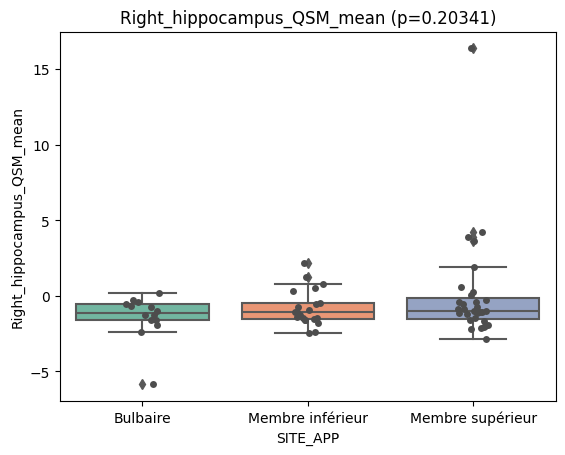

 Right_hippocampus_QSM_positive_median 
                 Right_hippocampus_QSM_positive_median                     
                                                  size mean  min   max  std
SITE_APP                                                                   
Bulbaire                                            14  1.6  0.9   3.4  0.7
Membre inférieur                                    21  1.7  0.8   3.4  0.7
Membre supérieur                                    31  4.7  1.0  44.7  9.1 
 ANOVA for Right_hippocampus_QSM_positive_median : 0.14853


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


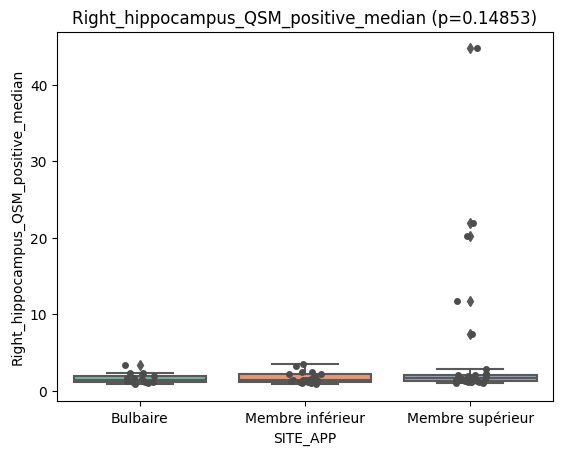

 Right_hippocampus_QSM_positive_mean 
                 Right_hippocampus_QSM_positive_mean                      
                                                size mean  min   max   std
SITE_APP                                                                  
Bulbaire                                          14  2.5  1.4   6.0   1.2
Membre inférieur                                  21  2.5  1.5   5.3   1.0
Membre supérieur                                  31  6.1  1.4  55.2  10.7 
 ANOVA for Right_hippocampus_QSM_positive_mean : 0.14613


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


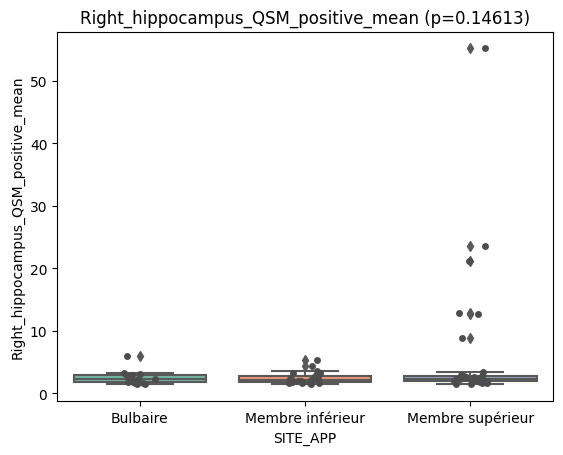

/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 Right_hippocampus_QSM_kurtosis 
                 Right_hippocampus_QSM_kurtosis                     
                                           size mean  min   max  std
SITE_APP                                                            
Bulbaire                                     14  6.5  0.8  23.0  7.2
Membre inférieur                             21  3.6  0.5  10.8  2.6
Membre supérieur                             31  4.3 -0.6  15.8  4.1 
 ANOVA for Right_hippocampus_QSM_kurtosis : 0.18199


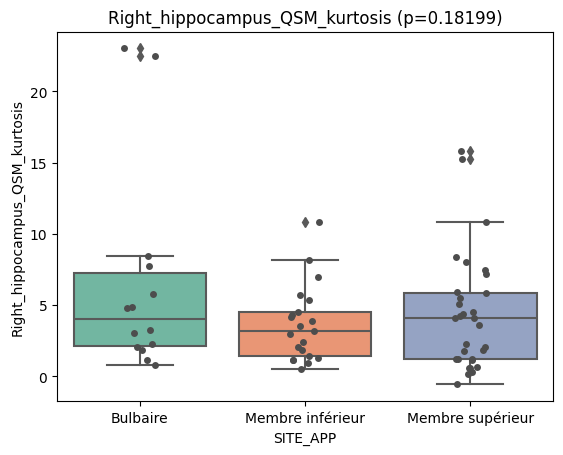

Processing region ID: ('Left_amygdala', 32)
Columns with region name: ['Left_amygdala_R2_median', 'Left_amygdala_R2_mean', 'Left_amygdala_QSM_median', 'Left_amygdala_QSM_mean', 'Left_amygdala_QSM_positive_median', 'Left_amygdala_QSM_positive_mean', 'Left_amygdala_QSM_kurtosis']
 Left_amygdala_R2_median 
                 Left_amygdala_R2_median                       
                                    size  mean   min   max  std
SITE_APP                                                       
Bulbaire                              14  23.7  22.3  26.0  1.2
Membre inférieur                      21  24.0  22.0  25.9  1.1
Membre supérieur                      31  23.9  21.5  27.4  1.4 
 ANOVA for Left_amygdala_R2_median : 0.8085


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


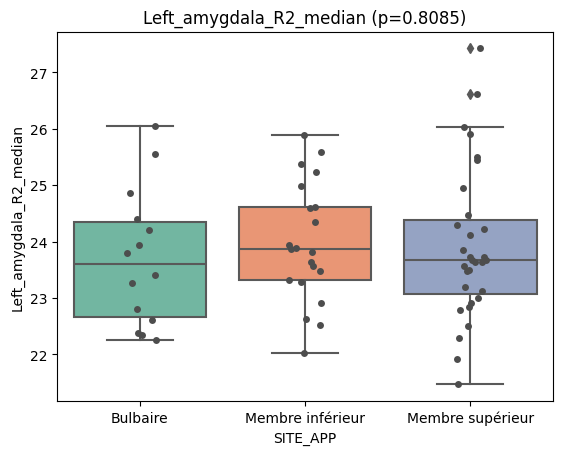

 Left_amygdala_R2_mean 
                 Left_amygdala_R2_mean                       
                                  size  mean   min   max  std
SITE_APP                                                     
Bulbaire                            14  24.4  22.7  28.9  1.6
Membre inférieur                    21  24.2  22.1  26.4  1.2
Membre supérieur                    31  24.5  21.6  29.0  1.6 
 ANOVA for Left_amygdala_R2_mean : 0.82434


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


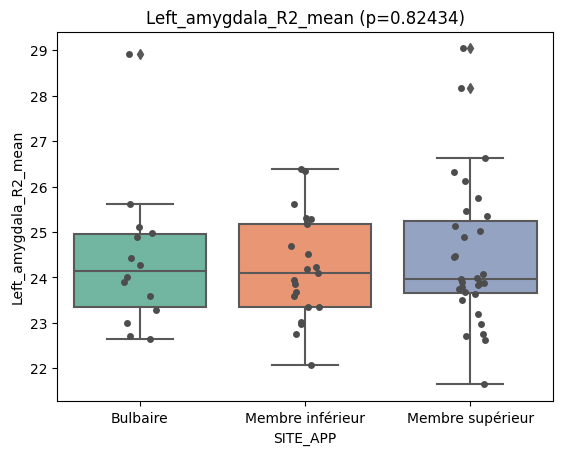

 Left_amygdala_QSM_median 
                 Left_amygdala_QSM_median                     
                                     size mean  min   max  std
SITE_APP                                                      
Bulbaire                               14 -2.0 -4.2   0.4  1.2
Membre inférieur                       21 -1.7 -6.7   3.4  2.0
Membre supérieur                       31  1.9 -4.4  37.2  9.6 
 ANOVA for Left_amygdala_QSM_median : 0.09246


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


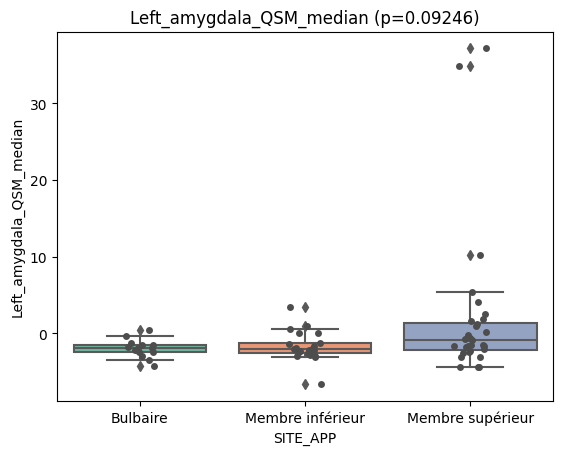

 Left_amygdala_QSM_mean 
                 Left_amygdala_QSM_mean                     
                                   size mean  min   max  std
SITE_APP                                                    
Bulbaire                             14 -2.0 -4.7   0.2  1.2
Membre inférieur                     21 -1.7 -7.1   3.0  2.0
Membre supérieur                     31  1.7 -4.6  35.5  8.9 
 ANOVA for Left_amygdala_QSM_mean : 0.08143


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


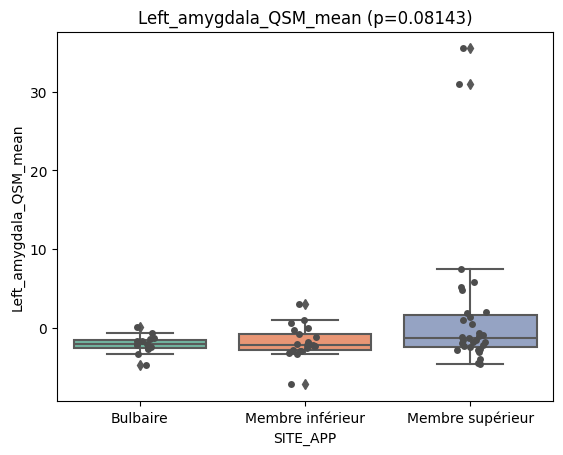

 Left_amygdala_QSM_positive_median 
                 Left_amygdala_QSM_positive_median                      
                                              size mean  min   max   std
SITE_APP                                                                
Bulbaire                                        14  1.5  0.6   4.2   0.9
Membre inférieur                                21  1.7  0.3   6.8   1.5
Membre supérieur                                31  7.3  0.5  74.7  15.9 
 ANOVA for Left_amygdala_QSM_positive_median : 0.11609


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


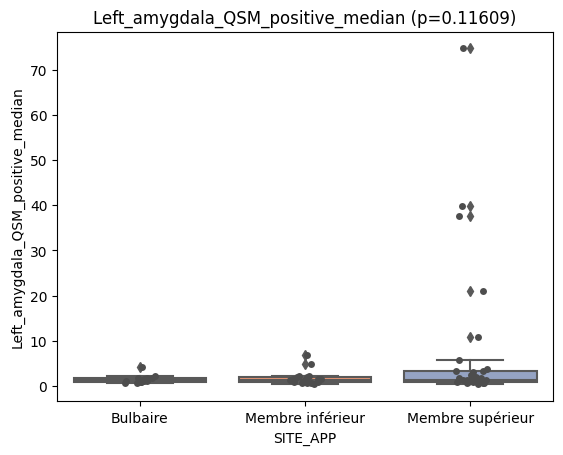

 Left_amygdala_QSM_positive_mean 
                 Left_amygdala_QSM_positive_mean                      
                                            size mean  min   max   std
SITE_APP                                                              
Bulbaire                                      14  2.5  0.8   6.1   1.7
Membre inférieur                              21  2.3  0.5   7.9   1.7
Membre supérieur                              31  8.6  0.8  90.0  18.3 
 ANOVA for Left_amygdala_QSM_positive_mean : 0.15047


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


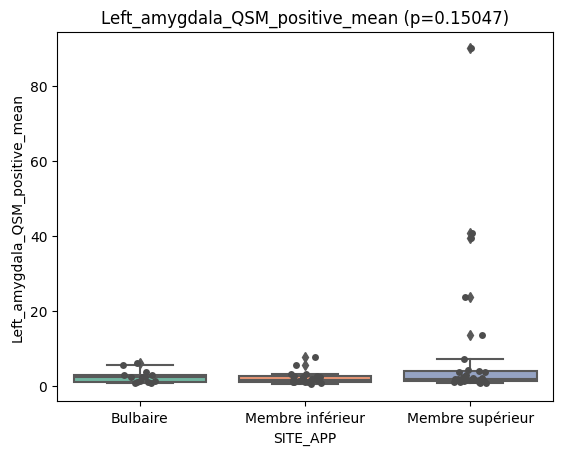

 Left_amygdala_QSM_kurtosis 
                 Left_amygdala_QSM_kurtosis                     
                                       size mean  min   max  std
SITE_APP                                                        
Bulbaire                                 14  7.8 -0.3  33.3  9.7
Membre inférieur                         21  3.9 -0.1  15.4  4.6
Membre supérieur                         31  2.6 -0.0  17.7  3.5 
 ANOVA for Left_amygdala_QSM_kurtosis : 0.02222


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


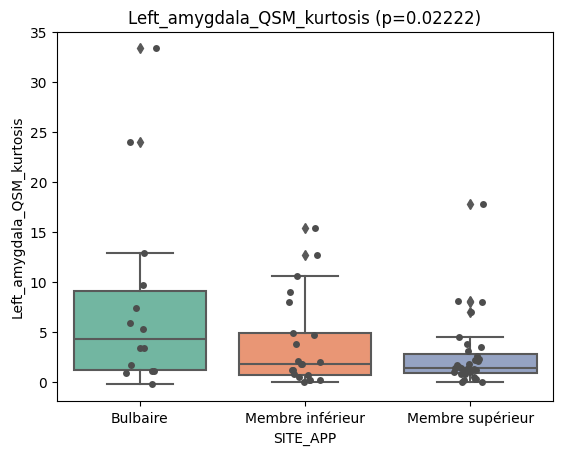

Processing region ID: ('Left_hippocampus', 48)
Columns with region name: ['Left_hippocampus_R2_median', 'Left_hippocampus_R2_mean', 'Left_hippocampus_QSM_median', 'Left_hippocampus_QSM_mean', 'Left_hippocampus_QSM_positive_median', 'Left_hippocampus_QSM_positive_mean', 'Left_hippocampus_QSM_kurtosis']
 Left_hippocampus_R2_median 
                 Left_hippocampus_R2_median                       
                                       size  mean   min   max  std
SITE_APP                                                          
Bulbaire                                 14  24.4  23.2  25.9  0.7
Membre inférieur                         21  24.6  23.7  27.0  0.9
Membre supérieur                         31  24.9  23.3  28.7  1.2 
 ANOVA for Left_hippocampus_R2_median : 0.36139


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


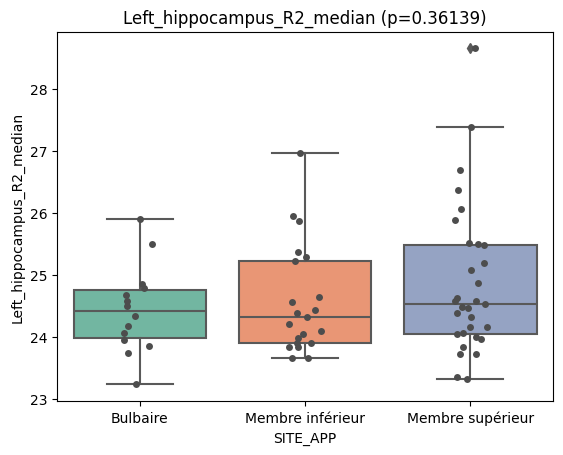

 Left_hippocampus_R2_mean 
                 Left_hippocampus_R2_mean                       
                                     size  mean   min   max  std
SITE_APP                                                        
Bulbaire                               14  25.1  23.8  26.7  0.8
Membre inférieur                       21  25.2  23.7  28.0  1.1
Membre supérieur                       31  25.7  23.6  31.4  1.5 
 ANOVA for Left_hippocampus_R2_mean : 0.23063


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


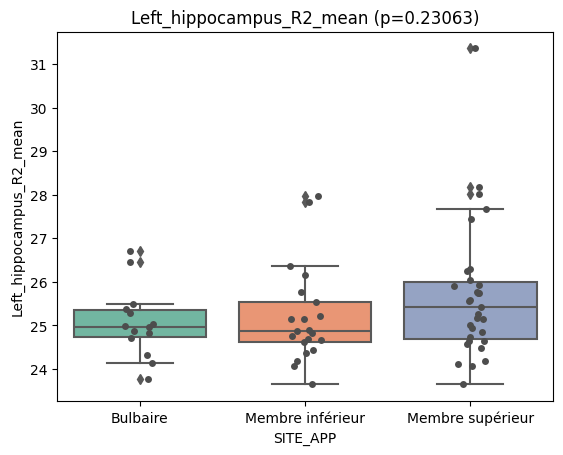

 Left_hippocampus_QSM_median 
                 Left_hippocampus_QSM_median                     
                                        size mean  min   max  std
SITE_APP                                                         
Bulbaire                                  14 -1.4 -3.4  -0.0  0.9
Membre inférieur                          21 -1.1 -2.9   1.2  1.0
Membre supérieur                          31  0.3 -4.6  25.2  5.5 
 ANOVA for Left_hippocampus_QSM_median : 0.27016


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


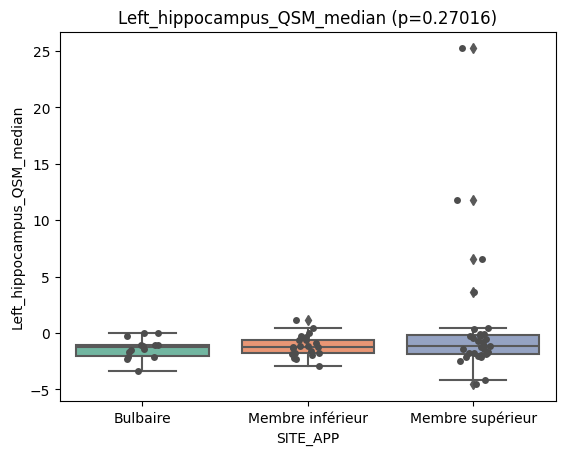

 Left_hippocampus_QSM_mean 
                 Left_hippocampus_QSM_mean                     
                                      size mean  min   max  std
SITE_APP                                                       
Bulbaire                                14 -1.3 -4.1   0.2  1.1
Membre inférieur                        21 -0.9 -2.5   1.3  1.0
Membre supérieur                        31  0.3 -3.3  23.7  4.8 
 ANOVA for Left_hippocampus_QSM_mean : 0.26707


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


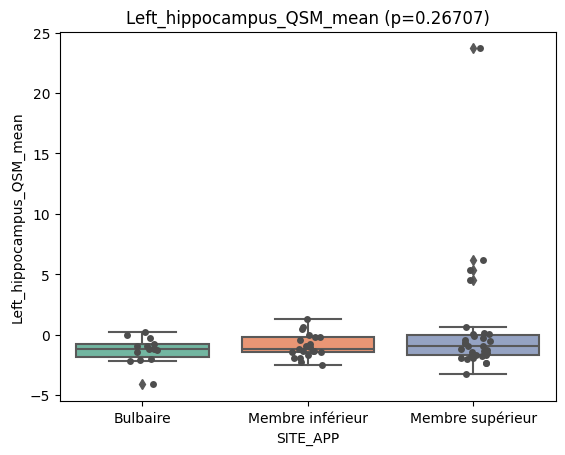

 Left_hippocampus_QSM_positive_median 
                 Left_hippocampus_QSM_positive_median                      
                                                 size mean  min   max   std
SITE_APP                                                                   
Bulbaire                                           14  1.6  0.9   2.9   0.5
Membre inférieur                                   21  1.8  0.7   3.5   0.7
Membre supérieur                                   31  5.3  1.0  53.9  10.8 
 ANOVA for Left_hippocampus_QSM_positive_median : 0.15803


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


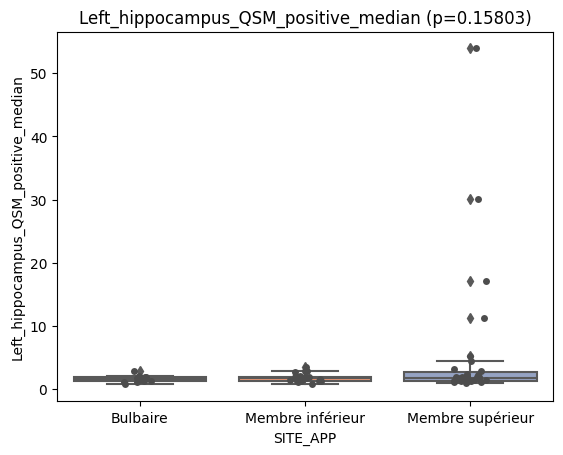

 Left_hippocampus_QSM_positive_mean 
                 Left_hippocampus_QSM_positive_mean                      
                                               size mean  min   max   std
SITE_APP                                                                 
Bulbaire                                         14  2.3  1.4   3.2   0.5
Membre inférieur                                 21  2.6  1.3   4.9   0.9
Membre supérieur                                 31  6.9  1.6  67.7  13.0 
 ANOVA for Left_hippocampus_QSM_positive_mean : 0.14871


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


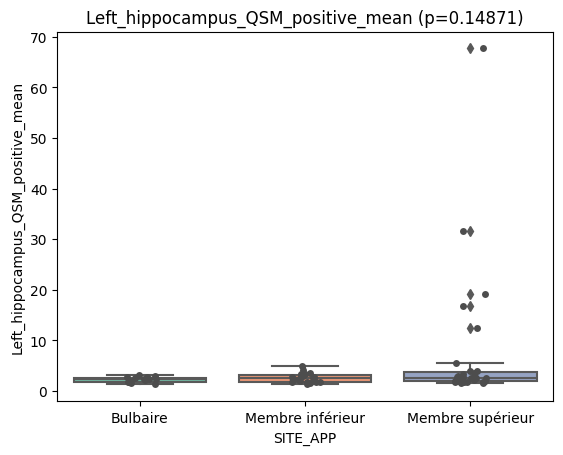

 Left_hippocampus_QSM_kurtosis 
                 Left_hippocampus_QSM_kurtosis                     
                                          size mean  min   max  std
SITE_APP                                                           
Bulbaire                                    14  4.9 -0.2  16.0  4.1
Membre inférieur                            21  4.6  0.5  17.8  4.1
Membre supérieur                            31  4.0 -0.9  15.9  3.4 
 ANOVA for Left_hippocampus_QSM_kurtosis : 0.73721


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


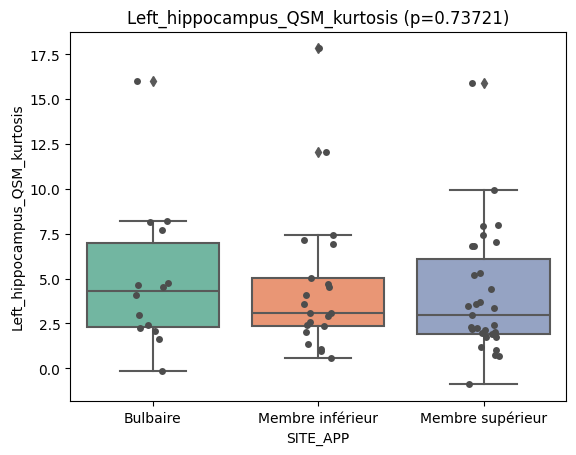

In [253]:
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    print(f"Columns with region name: {columns_with_region_name[1:]}")
    lbr.test_covar_funcWithANOVA(columns_with_region_name[1:], df_test, 'SITE_APP',1)

In [254]:
# Ajouter une colonne 'groupUMS' en fonction d'une condition
df_test['groupUMS'] = df_test['SITE_APP'].apply(lambda x: 'UMN' if x in ['Membre supérieur'] else 'Autres')
print(df_test[['SITE_APP', 'groupUMS']])

                        SITE_APP groupUMS
participant_id                           
01002KAP                Bulbaire   Autres
01005AGP        Membre inférieur   Autres
01006SCP        Membre inférieur   Autres
01007LAP        Membre inférieur   Autres
01008LBP                Bulbaire   Autres
...                          ...      ...
01172HRP        Membre supérieur      UMN
01178LDP        Membre supérieur      UMN
01179DDP        Membre inférieur   Autres
01186MJP        Membre supérieur      UMN
01189DLP                Bulbaire   Autres

[66 rows x 2 columns]


Processing region ID: ('Right_amygdala', 31)
Columns with region name: ['Right_amygdala_R2_median', 'Right_amygdala_R2_mean', 'Right_amygdala_QSM_median', 'Right_amygdala_QSM_mean', 'Right_amygdala_QSM_positive_median', 'Right_amygdala_QSM_positive_mean', 'Right_amygdala_QSM_kurtosis']
T-test for Right_amygdala_QSM_median : p-value=0.02314


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


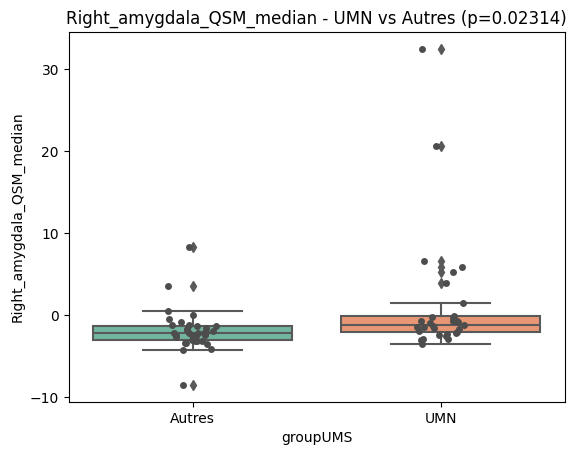

Processing region ID: ('Right_hippocampus', 47)
Columns with region name: ['Right_hippocampus_R2_median', 'Right_hippocampus_R2_mean', 'Right_hippocampus_QSM_median', 'Right_hippocampus_QSM_mean', 'Right_hippocampus_QSM_positive_median', 'Right_hippocampus_QSM_positive_mean', 'Right_hippocampus_QSM_kurtosis']
T-test for Right_hippocampus_QSM_median : p-value=0.08821


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


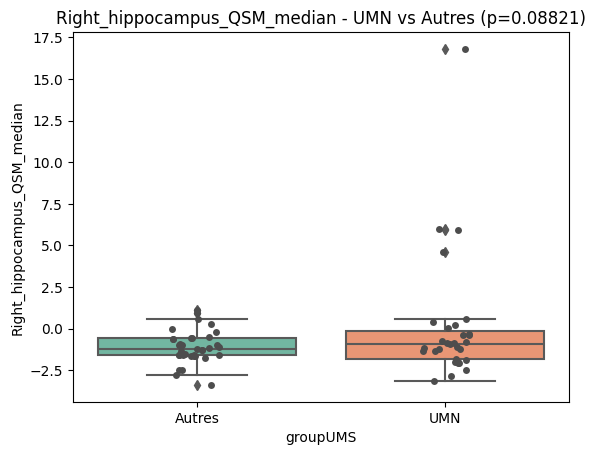

Processing region ID: ('Left_amygdala', 32)
Columns with region name: ['Left_amygdala_R2_median', 'Left_amygdala_R2_mean', 'Left_amygdala_QSM_median', 'Left_amygdala_QSM_mean', 'Left_amygdala_QSM_positive_median', 'Left_amygdala_QSM_positive_mean', 'Left_amygdala_QSM_kurtosis']
T-test for Left_amygdala_QSM_median : p-value=0.02871


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


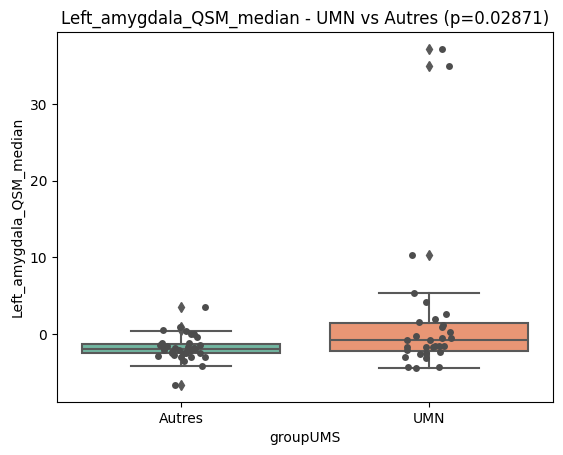

Processing region ID: ('Left_hippocampus', 48)
Columns with region name: ['Left_hippocampus_R2_median', 'Left_hippocampus_R2_mean', 'Left_hippocampus_QSM_median', 'Left_hippocampus_QSM_mean', 'Left_hippocampus_QSM_positive_median', 'Left_hippocampus_QSM_positive_mean', 'Left_hippocampus_QSM_kurtosis']
T-test for Left_hippocampus_QSM_median : p-value=0.10659


/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


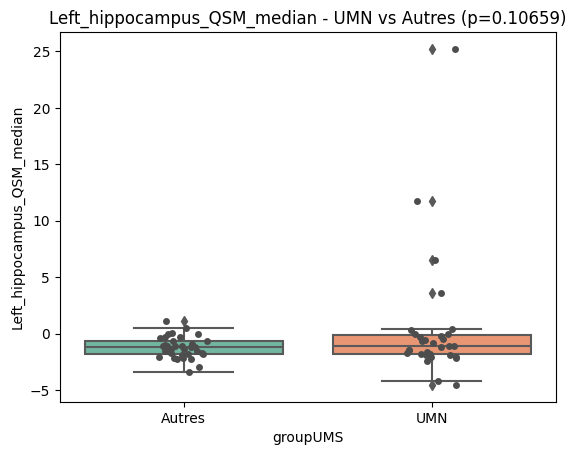

In [255]:
for region_name, region_id in amygdala_hippocampus_regions.items():
    print(f"Processing region ID: {region_name, region_id}")
    columns_with_region_name = [col for col in df_test.columns if region_name in col]
    print(f"Columns with region name: {columns_with_region_name[1:]}")
    lbr.test_covar_funcOnTwoGroups(columns_with_region_name[3:4], df_test, 'groupUMS', 'UMN', 'Autres',1)